In [1]:
# Making some fake data figures for planned PRL/PRAB paper(s)
# Imports
import matplotlib.pyplot as plt
import random
try:
    plt.style.use("huntstone")
except:
    plt.style.use("seaborn-colorblind")
import numpy as np
from scipy.constants import c, epsilon_0
inv_c = 1/c
from scipy.interpolate import interp1d
import sys
# Be sure to include your own path to the python modules
sys.path.insert(0, r'C:\\Users\\khunt\\Documents\\GitHub\\plasma-source\\khuntstone\\eos_bpm\\python\\')
sys.path.insert(0, "/home/keenan/plasma-source/khuntstone/eos_bpm/python/")
import currents as cp
import eo_signal as eos
from plotting import plot_signal

def las_int(x, y, sigr = 0.25e-3):
    I_prof = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            r = np.sqrt(x[i]*x[i]+y[j]*y[j])
            if r > 1.5e-3:
                I_prof[i,j] = 0
            else:
                I_prof[i,j] = np.exp(-r*r/(2*sigr*sigr))
    return I_prof

In [2]:
cpath = "/media/keenan/Data_Storage/Data/currents/"
setup = {
    "ctype"   : "gap",
    "d"       : 100e-6,
    "y0"      : 800e-9,
    "tp"      : 30e-15,
    "r0"      : 2.5e-3,
    "tau"     : np.linspace(-1000, 1000, 1000)*1e-15,
    "fpath"   : cpath,
    "nslice"  : 100,
    "method"  : "spatial",
    "process" : "cross",
    "angle"   : 15,

}

In [3]:
Q     = 1.5e-9
sigz  = 5e-6
sigt  = sigz/c
dt    = 0.1*sigt
N     = 8000
t     = np.linspace(-N*dt*0.5, N*dt*0.5, N)
rm    = 2.5e-3 + 10e-6
rp    = 2.5e-3 - 10e-6
E0p   = Q / ((2*np.pi)**(1.5)*rp*c*sigt*epsilon_0)
E0m   = Q / ((2*np.pi)**(1.5)*rm*c*sigt*epsilon_0)
Ep    = E0p*np.exp(-t*t/(2*sigt*sigt))
Em    = E0m*np.exp(-t*t/(2*sigt*sigt))
setup["tau"] = t
sigp, tsigp, gammap, tgammap = eos.E_signal(Ep, t, setup)
sigm, tsigm, gammam, tgammam = eos.E_signal(Em, t, setup)
g0 = 2*np.arcsin(np.sqrt(0.5*(sigp+sigm)))

In [4]:
norm = max(sigp)
sigp = sigp / norm
sigm = sigm / norm

In [ ]:
fig = plt.figure(figsize = (4,4) dpi = 300)
ax1 = fig.gca()
ax1.set_xlabel("t [fs]")
ax1.set_ylabel("R")
R = (sigp - sigm) / (sigp + sigm)
ax1.plot(tsigp*1e15, R)
ax1.set_xlim([-50, 50])
plt.show()

/home/keenan/.conda/envs/WARGSim/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


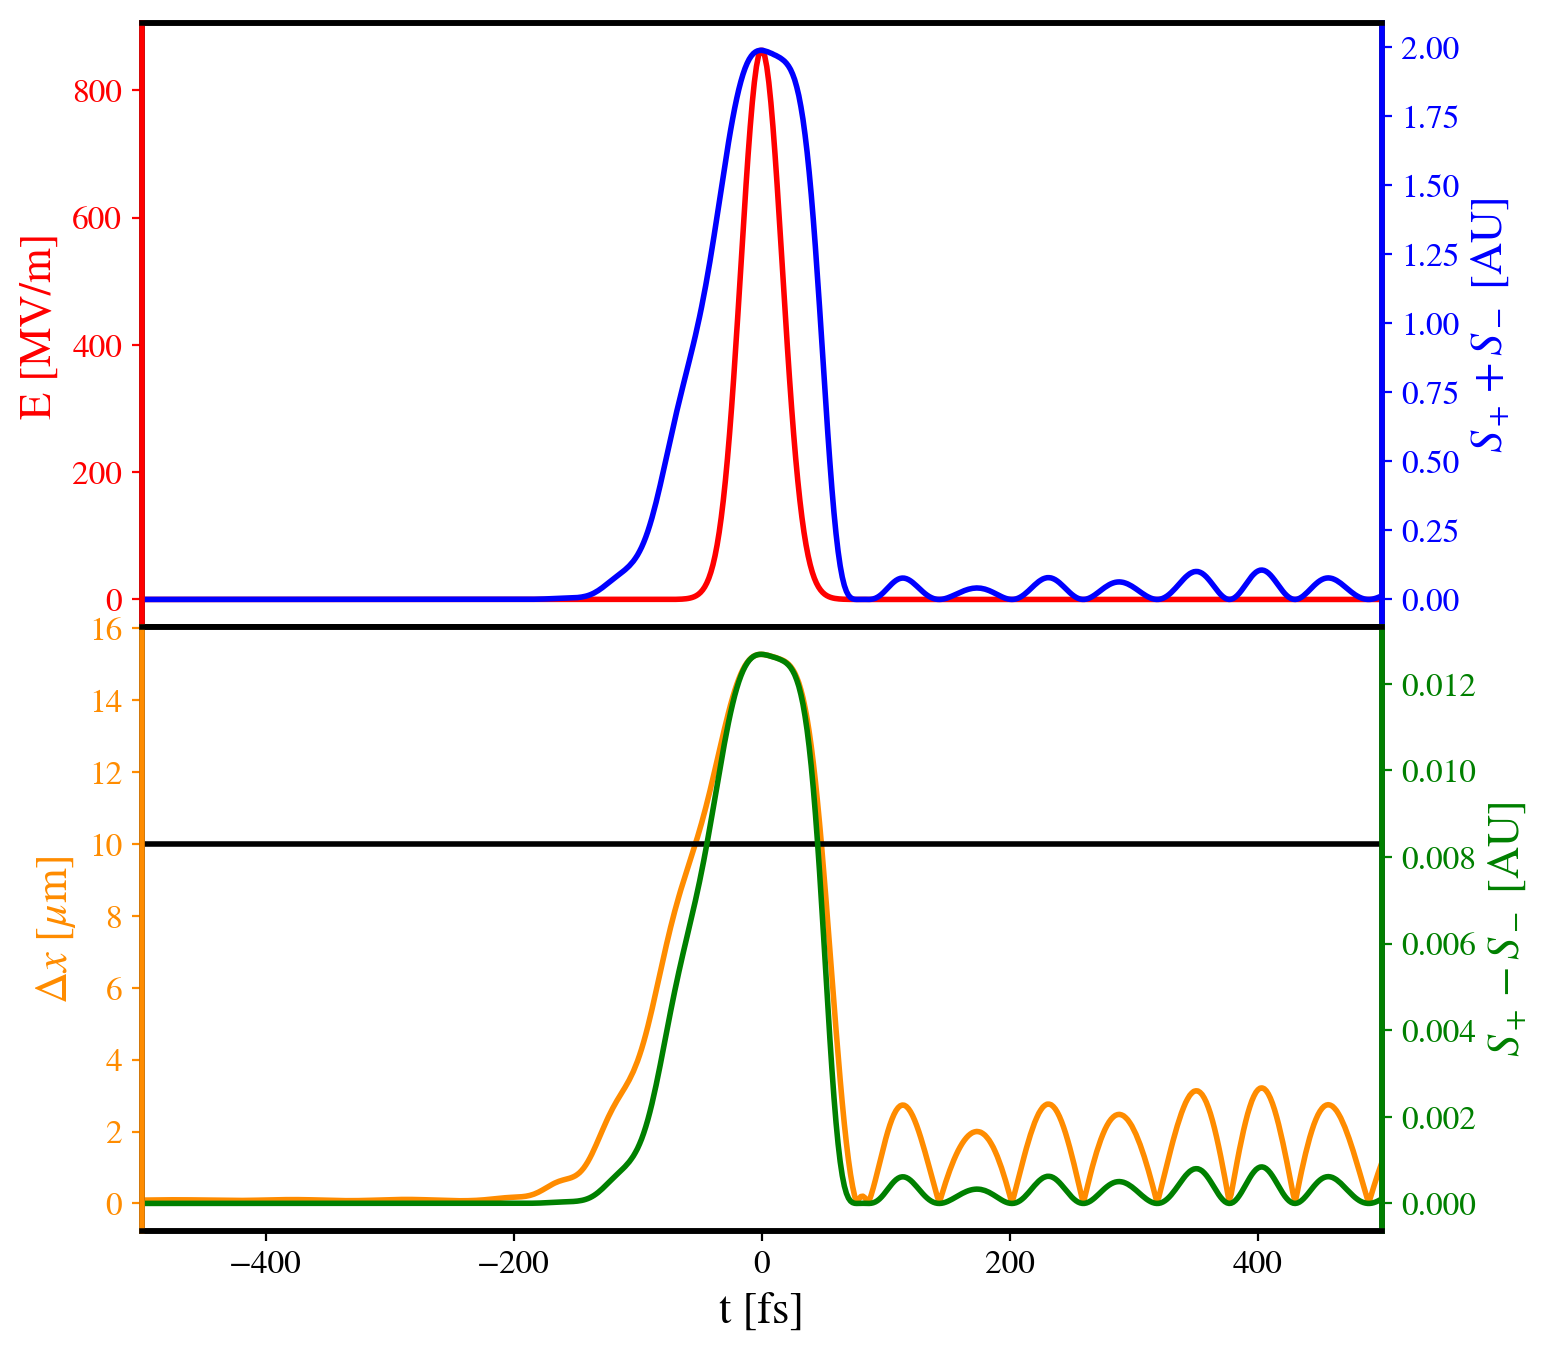

In [8]:
fig = plt.figure(figsize = (8,8), dpi = 200)
# Electric field
ax1 = fig.add_subplot(211)
ax1.set_xticks([])
ax1.set_xlim([-500, 500])
ax1.set_ylabel("E [MV/m]", color = "r")
ax1.tick_params(axis="y", color = "r", labelcolor="r")
ax1.plot(t*1e15, Ep/1e6, '-r')
# Combined signal
ax2 = ax1.twinx()
ax2.spines["left"].set_color("r")
ax2.spines["right"].set_color("b")
ax2.tick_params(axis="y", color = "b", labelcolor="b")
ax2.set_ylabel(r'$S_+ + S_-$ [AU]', color="b")
ax2.plot(tsigp*1e15, sigp + sigm, '-b')
# Reconstructed offset
ax3 = fig.add_subplot(212)
ax3.set_xlabel("t [fs]")
ax3.set_ylabel(r'$\Delta x$ [$\mu$m]', color = "darkorange")
ax3.tick_params(axis="y", color="darkorange", labelcolor="darkorange")
R = (sigp -sigm)/(sigp+sigm)
dx_re = 2.5e-3*np.tan(0.5*g0)*R*1e6
ax3.plot(tsigp*1e15, dx_re, color = "darkorange")
ax3.set_xlim([-500, 500])
ax3.axhline(y=10, color = "k")
# Signal difference
ax4 = ax3.twinx()
ax4.spines["left"].set_color("darkorange")
ax4.spines["right"].set_color("g")
ax4.set_ylabel(r'$S_+ - S_-$ [AU]', color = "g")
ax4.tick_params(axis="y", color="g", labelcolor="g")
ax4.plot(tsigp*1e15, sigp-sigm, '-g')
plt.subplots_adjust(hspace = 0)
plt.show()

In [7]:
max(dx_re)

1.2235825222182017

/home/keenan/.conda/envs/WARGSim/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


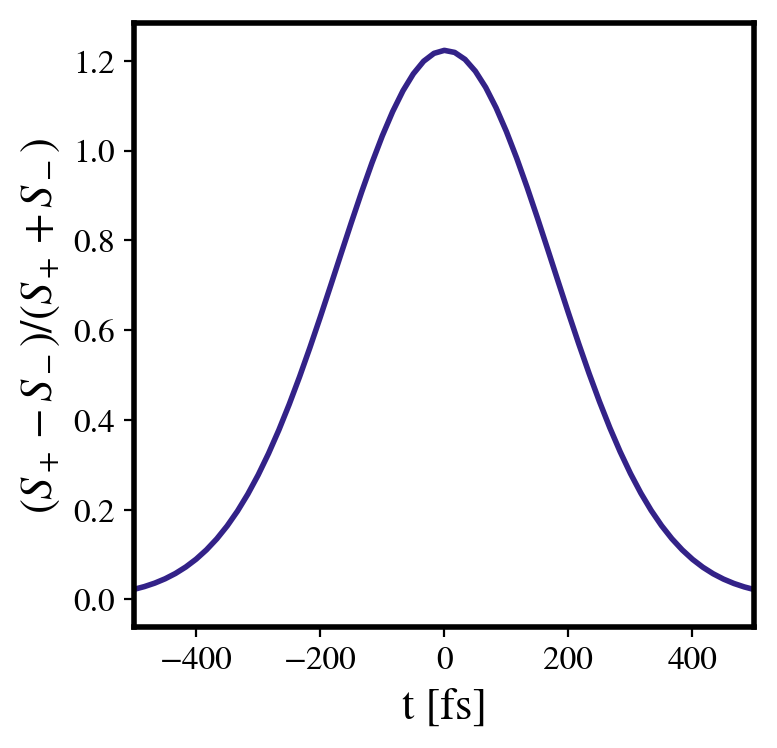

In [11]:
fig = plt.figure(figsize = (4,4), dpi = 200)
ax  = fig.gca()
ax.set_xlabel("t [fs]")
ax.set_ylabel(r'$(S_+ - S_-)/(S_+ + S_-)$')
R = (sigp-sigm)/(sigp+sigm)
gamma0 = 2*np.arcsin(np.sqrt(0.5*(sigp+sigm)))
ax.plot(tsigp*1e15, 2.5e-3*R*np.tan(g0*0.5)*1e6)
ax.set_xlim([-500, 500])
plt.show()

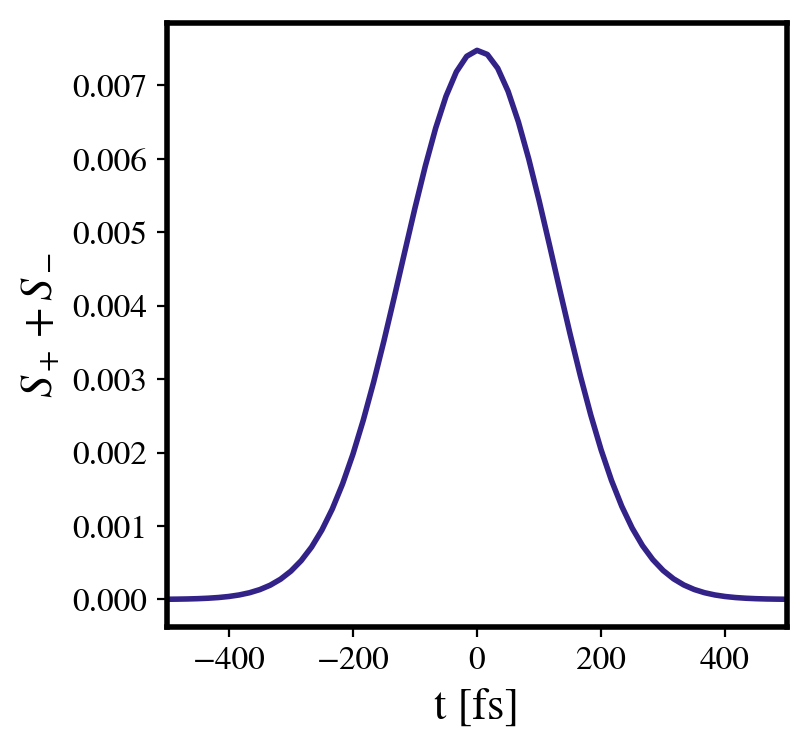

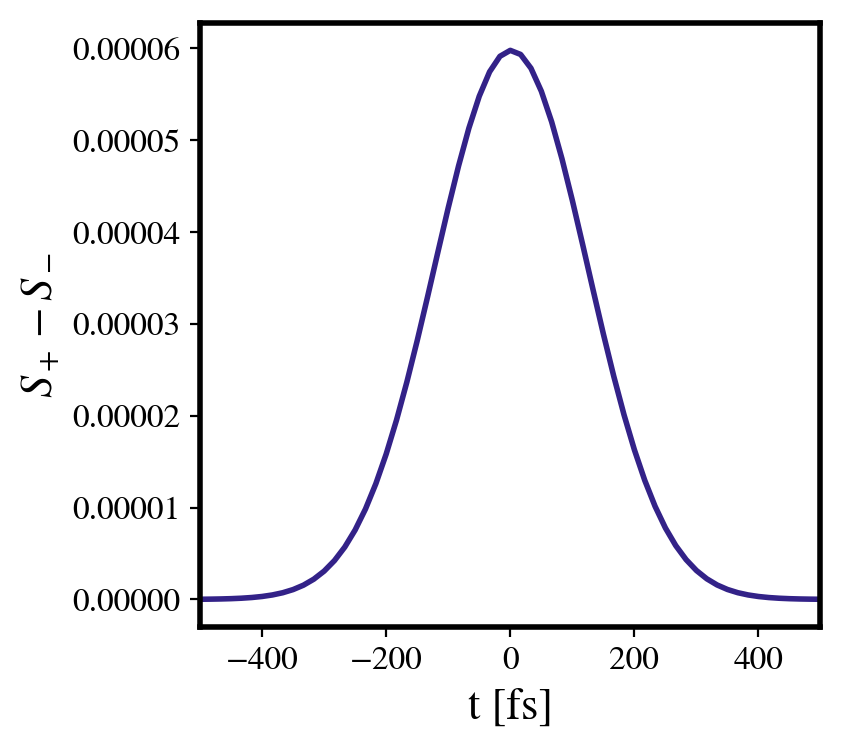

In [11]:
fig1 = plt.figure(figsize = (4,4), dpi = 200)
ax1  = fig1.gca()
ax1.set_xlabel('t [fs]')
ax1.set_ylabel(r'$S_+ + S_-$')
ax1.plot(tsigp*1e15, sigp+sigm)
ax1.set_xlim([-500, 500])

fig2 = plt.figure(figsize = (4,4), dpi = 200)
ax2  = fig2.gca()
ax2.set_xlabel("t [fs]")
ax2.set_ylabel(r'$S_+ - S_-$')
ax2.plot(tsigp*1e15, sigp-sigm)
ax2.set_xlim([-500, 500])
plt.show()


In [27]:
arg = E * (2*np.pi)**(1.5)*epsilon_0*r*c*sigt
arg = arg / (np.exp(-t*t/(2*sigt*sigt)))
np.nanmax(np.diff(arg)/np.diff(t))/1e3

/home/keenan/.conda/envs/WARGSim/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


86.39939517759227

In [4]:
Qs     = np.linspace(0.3, 2.0, 100)*1e-9
sigzs  = np.array([10, 20, 30, 40, 50])*1e-6
pers   = np.zeros((len(sigzs), len(Qs)))
#Is     = np.zeros((len(sigzs), len(Qs)))
#Is     = np.zeros((len(sigzs), len(Qs)))
g0s    = np.zeros((len(sigzs), len(Qs)))
N      = 8000
r      = 2.5e-3
E0_den = 1/((2*np.pi)**(1.5)*r*c*epsilon_0)
for i in range(len(sigzs)):
    print(i+1, "of", len(sigzs))
    sigt         = sigzs[i]/c
    inv_sigt     = 1/sigt
    dt           = 0.1*sigt
    t            = np.linspace(-N*dt*0.5, N*dt*0.5, N)
    setup["tau"] = t
    den          = 1/(2*sigt*sigt)
    for j in range(len(Qs)):
        Q = Qs[j]
        E0 = Q*E0_den*inv_sigt
        E  = E0*np.exp(-t*t*den)
        arg = E * (2*np.pi)**(1.5)*epsilon_0*r*c*sigt
        arg = arg / (np.exp(-t*t/(2*sigt*sigt)))
        #Is[i,j] = np.nanmax(np.diff(arg)/np.diff(t))
        sig, tsig, gamma, tgamma = eos.E_signal(E, t, setup)
        g0 = max(gamma)
        g0s[i,j] = g0
        pers[i,j] = 0.4e-3*g0*np.tan(0.5*g0)/(np.sin(0.5*g0)*np.sin(0.5*g0))

1 of 5


/home/keenan/.conda/envs/WARGSim/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


2 of 5
3 of 5
4 of 5
5 of 5


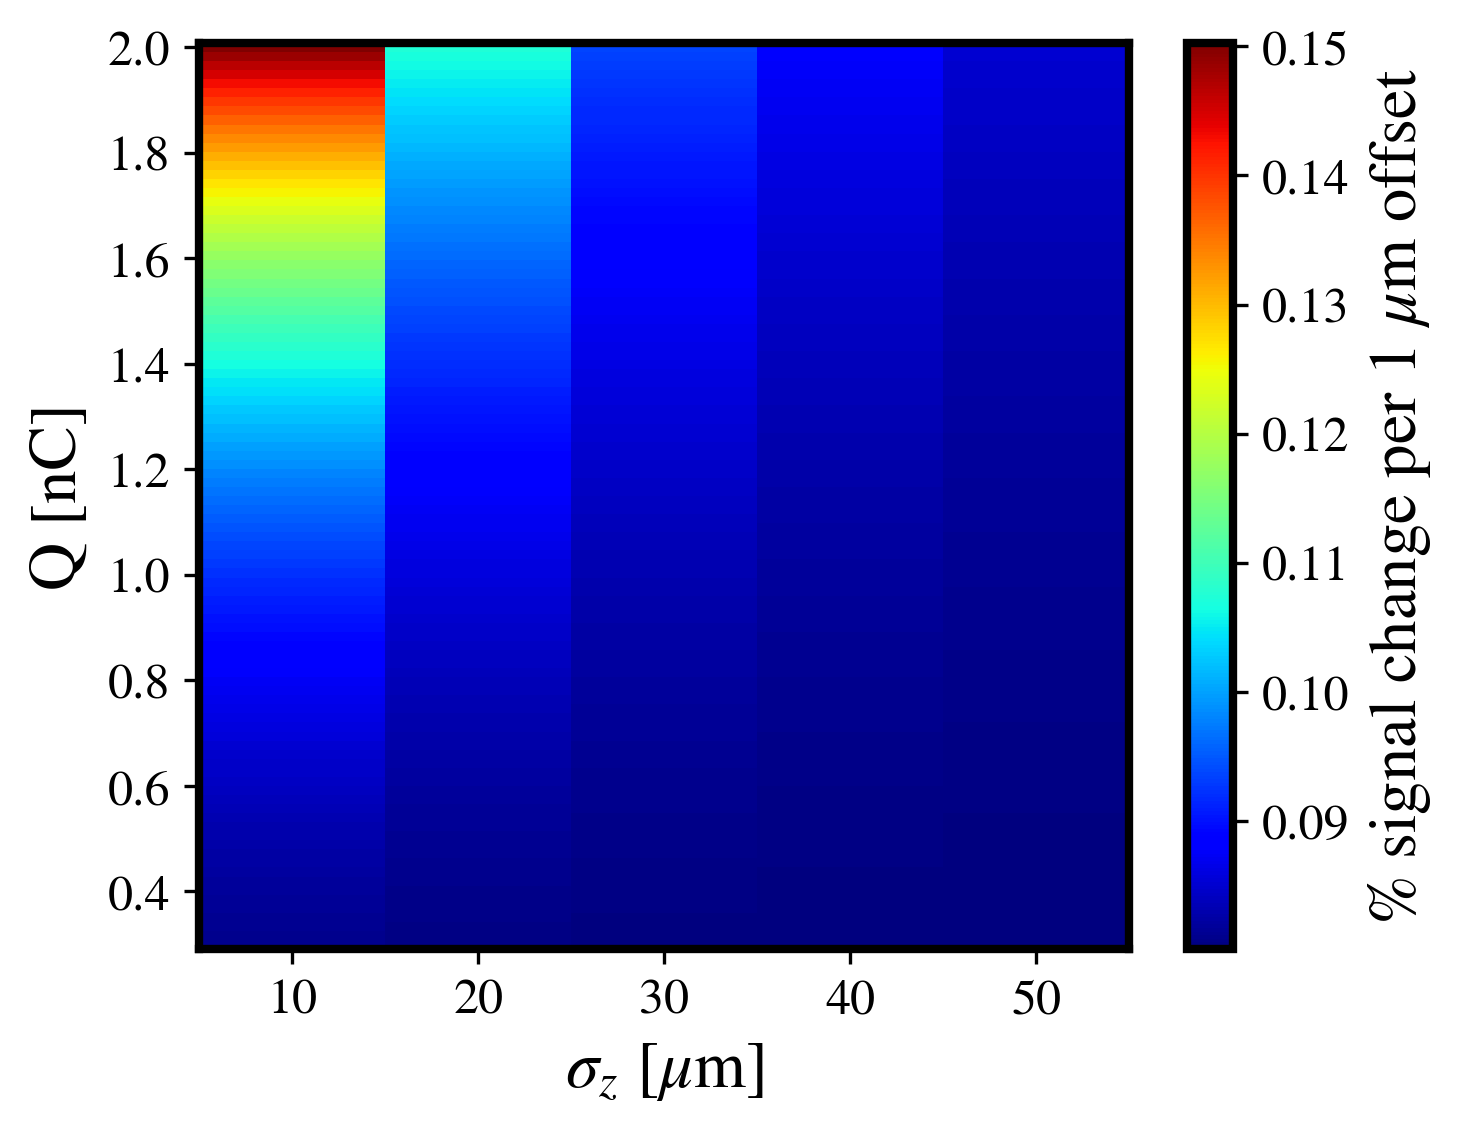

In [5]:
fig = plt.figure(figsize = (5,4), dpi = 300)
ax  = fig.gca()
ax.set_xlabel(r'$\sigma_z$ [$\mu$m]')
ax.set_ylabel("Q [nC]")
dq  = (Qs[1]-Qs[0])*1e9
dq2 = 0.5*dq
ext = [5, 55, Qs[0]*1e9-dq2, Qs[-1]*1e9+dq2]
img = ax.imshow(np.transpose(np.fliplr(pers*1e2)), aspect = "auto", cmap = "jet", extent = ext)
cbar = plt.colorbar(mappable = img)
cbar.set_label(r'% signal change per 1 $\mu$m offset')
plt.show()

In [16]:
Is    = np.linspace(1e-3, 50, 100)*1e3 
sigzs = np.array([5, 20, 35, 50])*1e-6
Qs    = np.zeros((len(sigzs), len(Is)))
pers  = np.zeros((len(sigzs), len(Is)))
g0s   = np.zeros((len(sigzs), len(Is)))
N = 8000
r = 2.5e-3
E0_den = 1/((2*np.pi)**(1.5)*r*c*epsilon_0)
for i in range(len(sigzs)):
    print(i+1, "of", len(sigzs))
    sigt = sigzs[i]/c
    inv_sigt = 1/sigt
    dt   = sigt*0.1
    t    = np.linspace(-N*dt*0.5, N*dt*0.5, N)
    setup["tau"] = t
    den  = 1/(2*sigt*sigt)
    for j in range(len(Is)):
        I = Is[j]*np.exp(-t*t*den)
        Qs[i,j] = np.trapz(I, t)
        E0 = Qs[i,j]*E0_den*inv_sigt
        E  = E0*np.exp(-t*t*den)
        sig, tsig, gamma, tgamma = eos.E_signal(E, t, setup)
        g0 = max(gamma)
        g0s[i,j] = g0
        pers[i,j] = 0.4e-3*g0*np.tan(0.5*g0)/(np.sin(0.5*g0)*np.sin(0.5*g0))

1 of 4
2 of 4
3 of 4
4 of 4


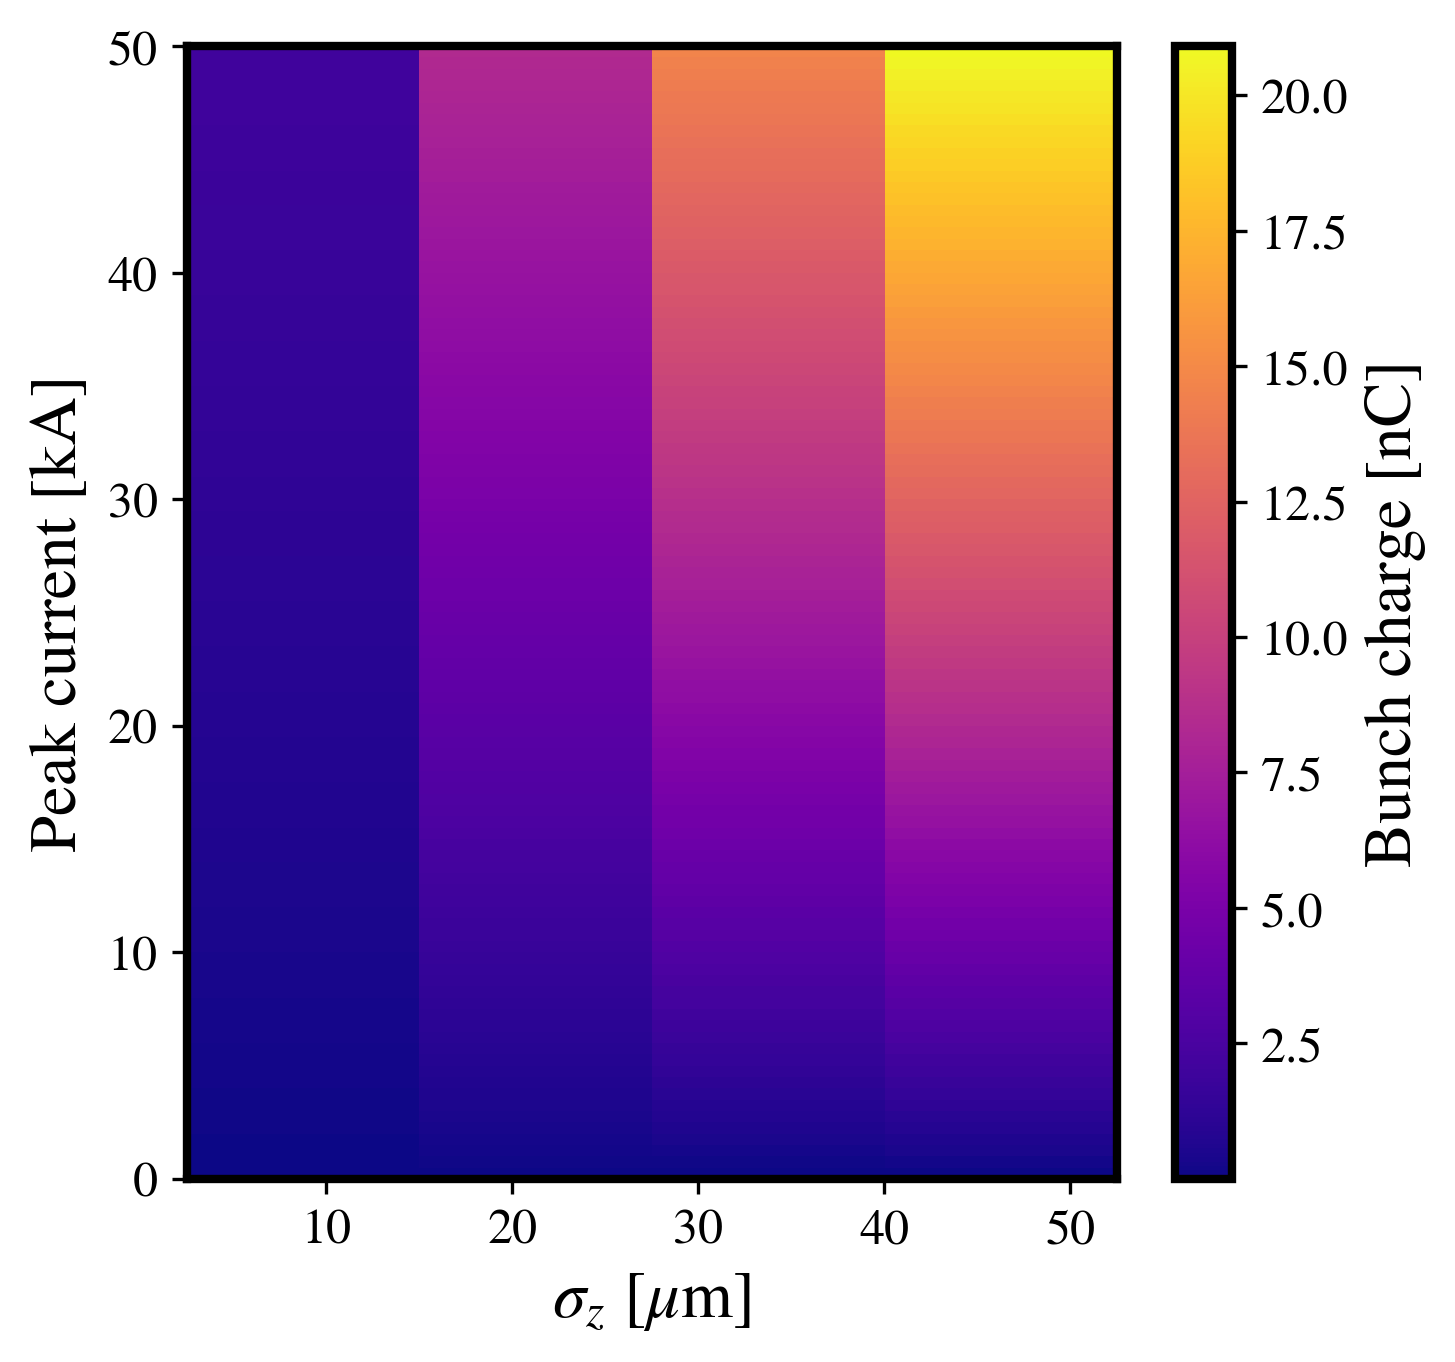

In [17]:
ext = [2.5, 52.5, min(Is*1e-3), max(Is*1e-3)]
fig = plt.figure(figsize = (5,5), dpi = 300)
ax  = fig.gca()
ax.set_xlabel(r'$\sigma_z$ [$\mu$m]')
ax.set_ylabel("Peak current [kA]")
img = ax.imshow(np.transpose(np.fliplr(Qs*1e9)), aspect = "auto", cmap = "plasma", extent = ext)
cbar = plt.colorbar(mappable = img)
cbar.set_label("Bunch charge [nC]")
plt.show()

/home/keenan/.conda/envs/WARGSim/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


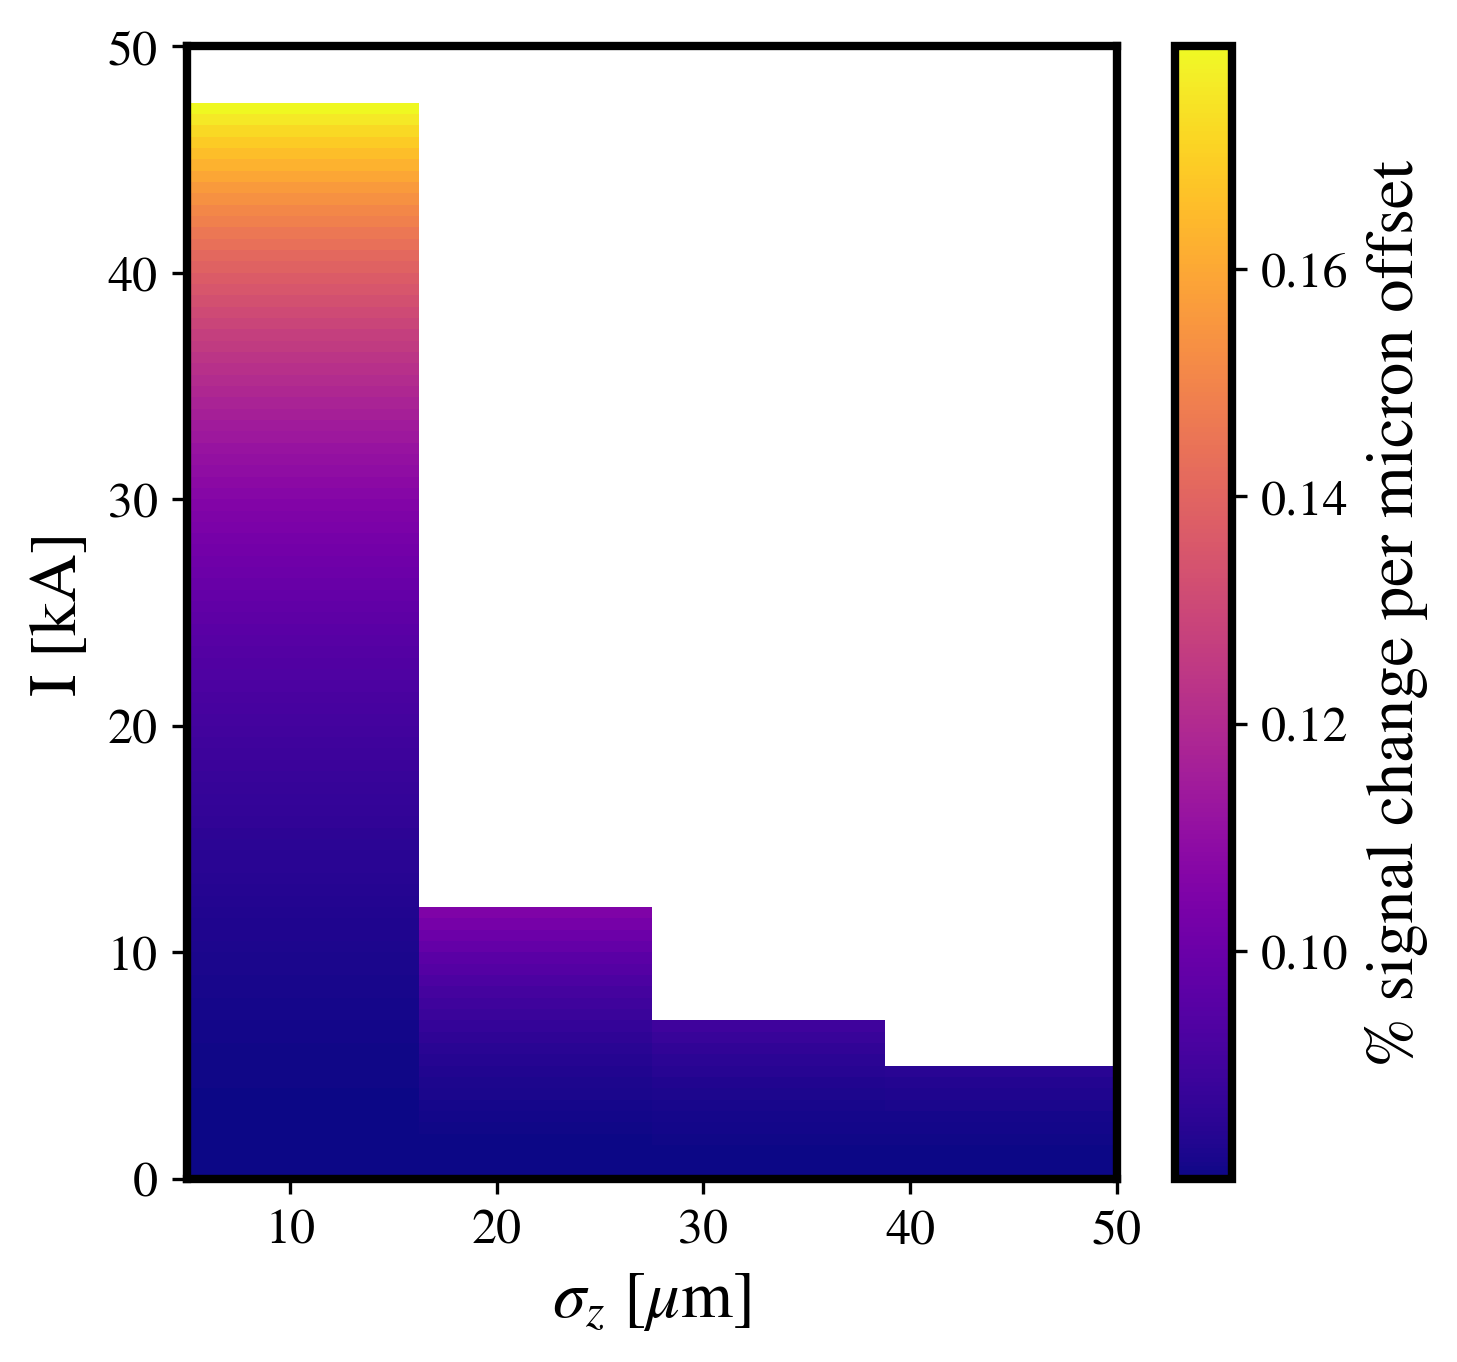

In [25]:
ext = [min(sigzs*1e6), max(sigzs*1e6), min(Is*1e-3), max(Is*1e-3)]
fig = plt.figure(figsize = (5,5), dpi = 300)
ax  = fig.gca()
ax.set_xlabel(r'$\sigma_z$ [$\mu$m]')
ax.set_ylabel("I [kA]")
pers_plot = pers
pers_plot[pers_plot<0]=np.nan
pers_plot[Qs>2.0e-9]=np.nan
img = ax.imshow(np.transpose(np.fliplr(pers_plot*1e2)), aspect = "auto", cmap = "plasma", extent = ext)
cbar = plt.colorbar(mappable = img)
cbar.set_label("% signal change per micron offset")
plt.show()

In [12]:
Qs[1, 32]

2.0270453454553395e-09

In [11]:
Is[32]*1e-3

16.16229292929293

In [9]:
np.argmax(pers_plot[0,:])

32

In [52]:
sigz   = 5e-6
I_peak = 50e3
sigt   = sigz/c
dti    = sigt/10
Ni     = 8000
ti     = np.linspace(-0.5*Ni*dti, 0.5*Ni*dti, Ni)
I      = I_peak*np.exp(-ti*ti/(2*sigt*sigt))
Q      = np.trapz(I, ti)
r      = 2.5e-3
E0     = Q / ((2*np.pi)**(1.5)*r*c*epsilon_0*sigt)
E      = E0*np.exp(-ti*ti/(2*sigt*sigt))
setup["tau"] = ti
sig, tsig, gamma, tgamma = eos.E_signal(E, ti, setup)
g0 = max(gamma)
dlta = 0.0004
per_inc = dlta*g0*np.tan(0.5*g0)/(np.sin(0.5*g0)*np.sin(0.5*g0))
print("I:", np.round(I_peak*1e-3, 3), "kA")
print("L:", np.round(sigz*1e6, 3), "micron")
print("E:", np.round(max(E*1e-9), 3), "MV/m")
print("Q:", np.round(Q*1e9, 3), "nC")
print("G:", np.round(g0, 3), "rad.")
print("%:", per_inc*100)

I: 50.0 kA
L: 5.0 micron
E: 1.198 MV/m
Q: 2.09 nC
G: 2.128 rad.
%: 0.2006614114909975


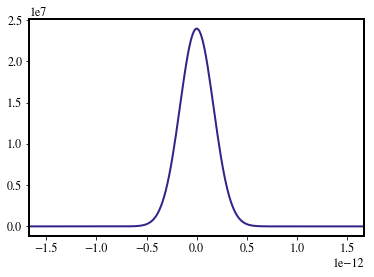

In [35]:
plt.plot(ti, E)
plt.xlim([-10*sigt, 10*sigt])
plt.show()

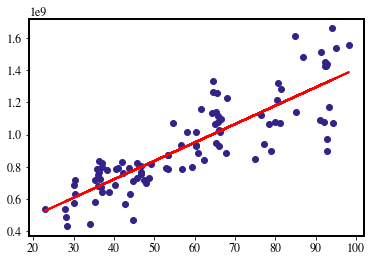

In [9]:
maxI = np.zeros(100)
maxE = np.zeros(100)
for i in range(100):
    I, ti, p2p = cp.get_current(i, cpath)
    E, te = cp.get_E(I, ti, 2.5e-3)
    maxI[i] = max(I)
    maxE[i] = max(E)
plt.plot(maxI, maxE, 'o')
p1, p2 = np.polyfit(maxI, maxE, deg = 1)
plt.plot(maxI, p1*maxI+p2,'-r')
plt.show()

In [17]:
print(p1, p2)

11414431.755331585 266013274.54319602


In [9]:
def get_E(Q, sigz, r):
    # Assume 10% noise
    sigt = sigz / c
    den  = (2*np.pi)**(1.5)*epsilon_0*(r)*c*sigt
    E0   = Q / den
    dt   = sigt*0.1
    te   = np.linspace(-4000*dt, 4000*dt, 8000)
    E    = E0 * np.exp(-te*te*0.5/(sigt*sigt))
    return E, te

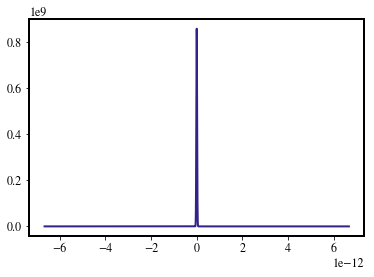

In [10]:
E, te = get_E(1.5e-9, 5e-6, 2.5e-3)
plt.plot(te, E)
plt.show()

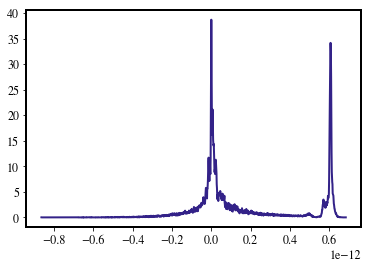

In [12]:
I, ti, p2p = cp.get_current(0, cpath)
plt.plot(ti, I)
plt.show()

In [21]:
Qs      = np.array([0.4, 1, 0.4, 1, 1.5])*1e-9
sigzs   = np.array([30, 30, 50, 50, 15])*1e-6
r0      = 2.5e-15
g0      = np.zeros(len(Qs))
per_inc = np.zeros(len(Qs))
for i in range(len(Qs)):
    print(i+1)
    E, te = get_E(Qs[i], sigzs[i], 2.5e-3)
    sig, tsig, gamma, tgamma = eos.E_signal(E, te, setup)
    g0[i]  = max(gamma)
    den = np.sin(0.5*g0[i])*np.sin(0.5*g0[i])
    num = 0.4e-3*g0[i]*np.tan(0.5*g0[i])
    per_inc[i] = (num/den)*100

1
2
3
4


In [32]:
print("Q", r'Length', "Gamma", "% Increase")
print("-------------------------------")
for i in range(len(Qs)):
    print(np.round(Qs[i]*1e9, 1), np.round(sigzs[i]*1e6), np.round(g0[i], 2), per_inc[i])

Q Length Gamma % Increase
-------------------------------
0.4 30.0 0.19 124239.68010785182
1.0 30.0 0.48 120293.40429424829
0.4 50.0 0.12 124688.32394925861
1.0 50.0 0.31 123059.6663004905


In [31]:
(((0.4e-3)*g0*np.tan(0.5*g0)) / ((np.sin(0.5*g0)*np.sin(0.5*g0)))) * 100

array([0.08048958, 0.08313008, 0.08019997, 0.08126139])

In [46]:
# First data figure x_bpm vs x_eos-bpm
N_shots  = 100
N_arr    = np.linspace(0, N_shots, N_shots)
dx_nom   = (10e-6)*np.sin(N_arr*np.pi/(0.5*N_shots))
dx_act   = np.zeros(N_shots)
x_eos    = np.zeros(N_shots)
Q_nom    = 1.5e-9
sigz_nom = 50e-6
for i in range(N_shots):
    if (i+1)%10==0:
        print(i+1)
    # Assume 10% noise in offset 
    dx_act[i] = dx_nom[i]+dx_nom[i]*random.randrange(-1, 2, 2)*0.1*random.random()
    dx  = dx_act[i]
    rp  = 2.5e-3 + dx
    rm  = 2.5e-3 - dx 
    Q    = Q_nom + Q_nom*random.randrange(-1, 2, 2)*0.1*random.random()
    sigz = sigz_nom + sigz_nom*random.randrange(-1, 2, 2)*0.1*random.random()
    Ep, tep = get_E(Q, sigz, rp)
    Em, tem = get_E(Q, sigz, rm)
    E0, te0 = get_E(Q, sigz, 2.5e-3)
    setup["tau"] = te0
    sigp, t_sigp, gammap, t_gammap = eos.E_signal(Ep, tep, setup)
    sigm, t_sigm, gammam, t_gammam = eos.E_signal(Em, tem, setup)
    R  = (max(sigp) - max(sigm)) / (max(sigp) + max(sigm))
    g0 = 2*np.arcsin(np.sqrt(0.5*(max(sigp)+max(sigm))))
    x_eos[i] = -(2.5e-3)*np.tan(0.5*g0)*R*1e6

10
20
30
40
50
60
70
80
90
100


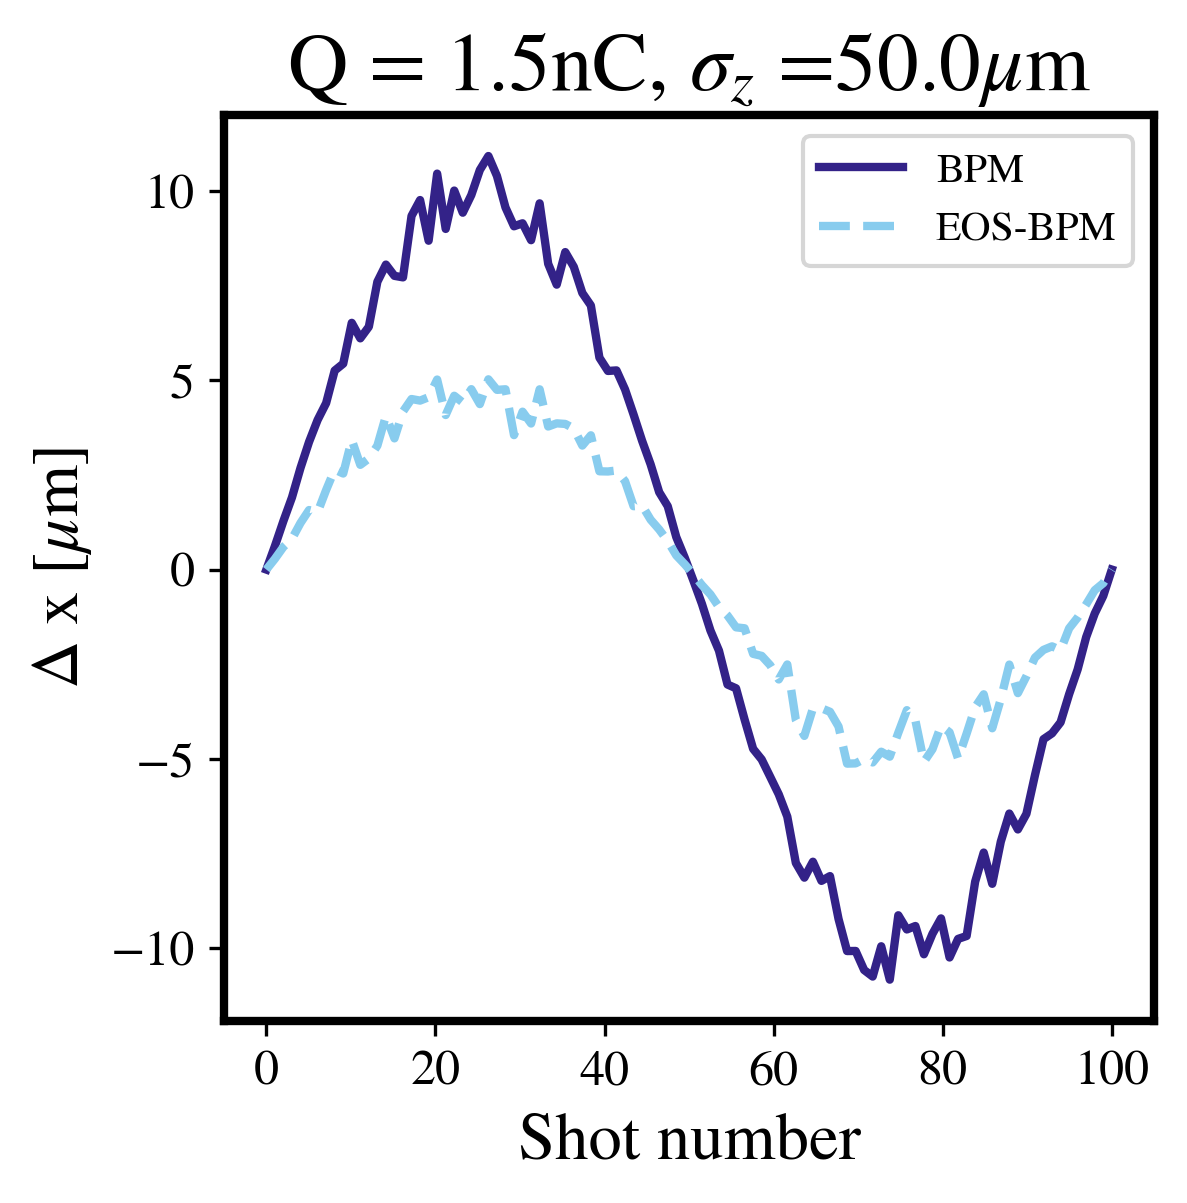

In [47]:
fig = plt.figure(figsize = (4,4), dpi = 300)
ax  = fig.gca()
ax.set_xlabel("Shot number")
ax.set_ylabel(r'$\Delta$ x [$\mu$m]')
ax.plot(N_arr, dx_act*1e6, label = "BPM")
ax.plot(N_arr, x_eos, '--', label = "EOS-BPM")
ax.set_title(r'Q = ' + str(Q_nom*1e9) + r'nC, ' + r'$\sigma_z$ =' + str(sigz_nom*1e6) + r'$\mu$m')
ax.legend()
plt.show()

In [26]:
2*np.arcsin(np.sqrt(max(sig0)))

0.34636924480697745

In [27]:
max(gamma0)

0.34636924480697745

In [30]:
2*np.arcsin(np.sqrt(0.5*(max(sigp) + max(sigm))))

0.3463715965441059

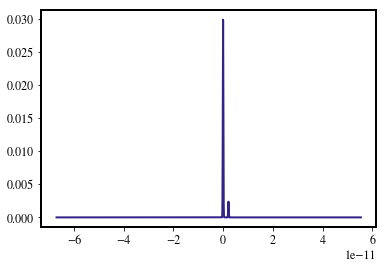

In [21]:
plt.plot(t_sigp, sigp)
plt.show()

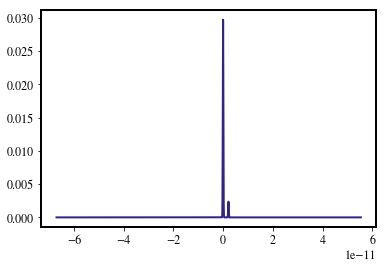

In [22]:
plt.plot(t_sig0, sig0)

In [16]:
2.5e-3*np.tan(0.5*0.34)*R*1e6

3.2274606689084524

In [9]:
2*np.arcsin(0.5 * (max(sigp) + max(sigm)))

0.05761325983674761

In [21]:
rm*1e3

2.501036850115594

In [9]:
np.sin(0.5*g0)*np.sin(0.5*g0)

2.2198204005974163e-08

In [2]:
# 2D Image of EOS signal on camera
save = False
run  = True
if run:
    # Camera pixel size is 2.5 microns
    dd   = 2.5e-6
    xlas = np.arange(-3e-3, 3e-3+dd, dd)
    ylas = np.arange(-3e-3, 3e-3+dd, dd)
    #xlas = np.linspace(-3e-3, 3e-3, 100)
    #ylas = np.linspace(-3e-3, 3e-3, 100)
    I_prof = las_int(xlas,ylas,sigr=0.5e-3)
    # EOS setup
    tau   = xlas * np.tan(15 * np.pi/180)/c
    r0    = 2.5e-3
    cpath = "/media/keenan/Data_Storage/Data/currents/"
    setup = {
        "ctype"   : "gap",
        "d"       : 100e-6,
        "y0"      : 800e-9,
        "tp"      : 30e-15,
        "r0"      : 2.5e-3,
        "tau"     : tau,
        "fpath"   : cpath,
        "nslice"  : 100,
        "method"  : "spatial",
        "process" : "cross",
        "angle"   : 15,

    }
    # Compute signal on a grid
    import time
    ind    = 0
    sig_p  = np.zeros((len(xlas), len(ylas)))
    sig_m  = np.zeros((len(xlas), len(ylas)))
    start  = time.time()
    dx     = 10e-6
    setup["r0"] = 2.5e-3 + dx
    sigp, tsig  = eos.get_signal(ind, setup)
    setup["r0"] = 2.5e-3-dx
    sigm, tsig  = eos.get_signal(ind, setup)
    setup["r0"] = 2.5e-3
    sig0, tsig0 = eos.get_signal(ind, setup)
    for i in range(len(xlas)):
        if(i+1)%100==0:
            print(i+1, "of", len(xlas))
        x = xlas[i]
        for j in range(len(ylas)):
            y = ylas[j]
            r = np.sqrt(x*x+y*y)
            if r <= 1.5e-3:
                sig_p[:,j]  = sigp
                sig_m[:, j] = sigm
    print(time.time()-start)

100 of 2401
200 of 2401
300 of 2401
400 of 2401
500 of 2401
600 of 2401
700 of 2401
800 of 2401
900 of 2401
1000 of 2401
1100 of 2401
1200 of 2401
1300 of 2401
1400 of 2401
1500 of 2401
1600 of 2401
1700 of 2401
1800 of 2401
1900 of 2401
2000 of 2401
2100 of 2401
2200 of 2401
2300 of 2401
2400 of 2401
36.983919858932495


In [9]:
# Shift xlas to center on peak signal
from collections import deque
# Shift drive to be closer to laser edge 
N_shift = -200
I_sig_p    = I_prof * np.roll(sig_p, N_shift, axis=0)
I_sig_m    = I_prof * np.roll(sig_m, N_shift+30, axis=0)
test_arr   = np.roll(sig_p, N_shift, axis=0)
test_sig   = test_arr*I_prof
int_sigp = np.sum(sig_p, axis = 1)
int_sigm = np.sum(sig_m, axis = 1)
xlas_p  = xlas - xlas[np.argmax(int_sigp)]
# Set random pixel shift of one array
N_pix   = random.randint(30, 70)
xlas_m  = xlas - xlas[np.argmax(int_sigm) + N_pix]
if save:
    camera_arr = ((xlas, ylas), plot_arr)
    np.save("eos_camera.npy", camera_arr)

In [3]:
def gen_bkg(xlas, ylas, pksig):
    avg_bkg = np.zeros((len(xlas), len(ylas)))
    for i in range(10):
        avg_bkg += np.random.rand(len(xlas), len(ylas))*0.1*pksig
    avg_bkg = 0.1*avg_bkg
    bkg = 0.1*pksig*np.random.rand(len(xlas), len(ylas))
    return bkg, avg_bkg

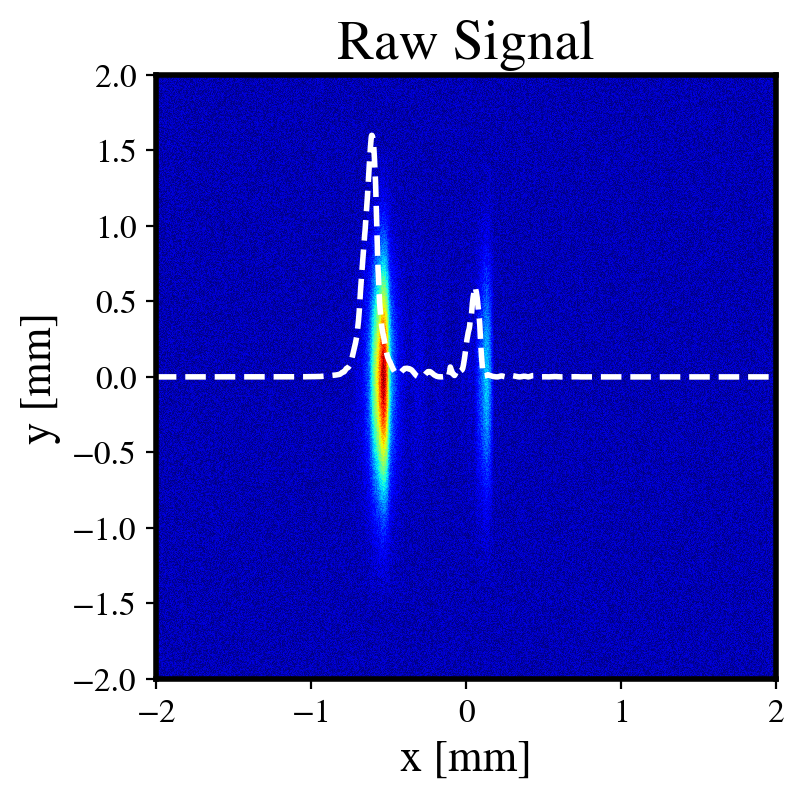

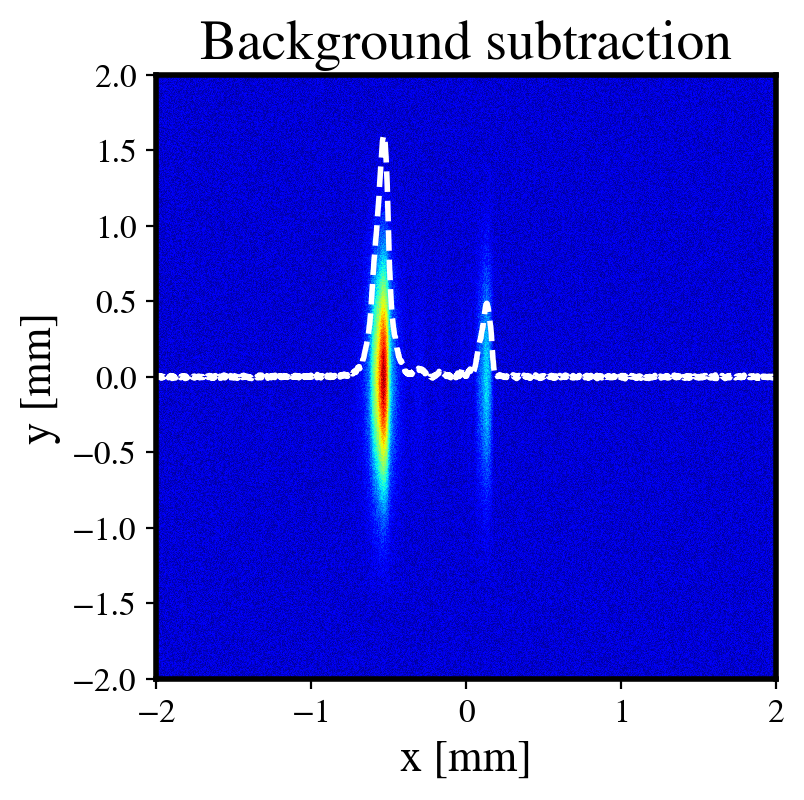

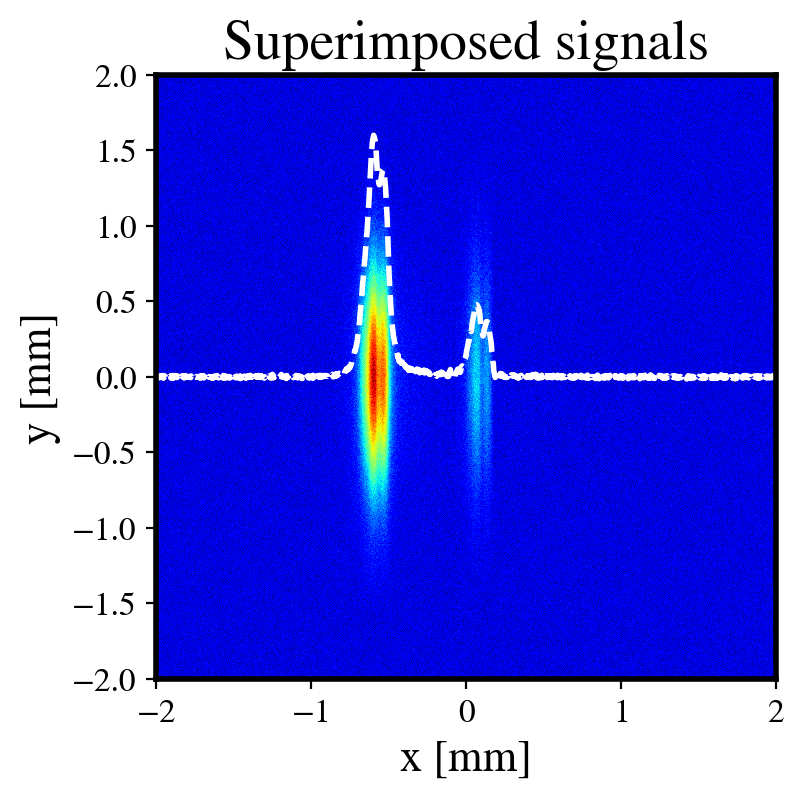

In [26]:
# - Crystal with and without backgrounds
run = True
if run:
    xplot    = xlas_m
    yplot    = ylas
    spot_sig = I_sig_m
    bkg, avg_bkg = gen_bkg(xlas, ylas, np.amax(spot_sig))
    bkg_arr = spot_sig + bkg
    an_arr  = bkg_arr - avg_bkg
    int_sig  = np.sum(an_arr, axis = 1)
    ext = np.array([min(xplot), max(xplot), min(yplot), max(yplot)])*1e3
    fig1 = plt.figure(figsize = (4,4), dpi = 200)
    ax1  = fig1.gca()
    test_arr = np.roll(bkg_arr, -30, axis = 0)
    ax1.imshow(np.transpose(np.fliplr(bkg_arr)), aspect = "auto", extent = ext, cmap = "jet")
    ax1.set_xlim([-2, 2])
    ax1.set_ylim([-2, 2])
    test_int = np.sum(test_sig, axis=1)
    ax1.plot(xlas_m*1e3, 1.6*test_int/max(test_int), '--w')
    ax1.set_xlabel("x [mm]")
    ax1.set_ylabel("y [mm]")
    ax1.set_title("Raw Signal")
    plt.show()

    fig2 = plt.figure(figsize = (4,4), dpi = 200)
    ax2  = fig2.gca()
    ax2.imshow(np.transpose(np.fliplr(an_arr)), aspect = "auto", extent = ext, cmap = "jet")
    ax2.set_xlim([-2, 2])
    ax2.set_ylim([-2, 2])
    ax2.plot(xlas_m*1e3, 1.6*int_sig/max(int_sig), '--w')
    ax2.set_xlabel("x [mm]")
    ax2.set_ylabel("y [mm]")
    ax2.set_title("Background subtraction")
    plt.show()
    
    
    fig3 = plt.figure(figsize = (4,4), dpi = 200)
    ax3  = fig3.gca()
    bkg_p, avg_bkg_p = gen_bkg(xlas, ylas, np.amax(I_sig_p))
    bkg_m, avg_bkg_m = gen_bkg(xlas, ylas, np.amax(I_sig_m))
    spot_sig_p = I_sig_p + bkg_p - avg_bkg_p
    spot_sig_m = I_sig_m + bkg_m - avg_bkg_m
    sup_arr    = spot_sig_p + spot_sig_m
    int_arr = np.sum(sup_arr, axis = 1)
    int_arr = 1.6*int_arr/max(int_arr)
    int_arr_p = np.sum(spot_sig_p, axis=1)
    int_arr_p = int_arr_p/max(int_arr_m)
    int_arr_m = np.sum(spot_sig_m, axis=1)
    int_arr_m = int_arr_m/max(int_arr_m)
    ax3.imshow(np.transpose(np.fliplr(sup_arr)), aspect = "auto", extent = ext, cmap = "jet")
    ax3.plot(xlas_m*1e3, int_arr, '--w')
    ax3.set_xlim([-2, 2])
    ax3.set_ylim([-2, 2])
    ax3.set_xlabel("x [mm]")
    ax3.set_ylabel("y [mm]")
    ax3.set_title("Superimposed signals")
    plt.show()

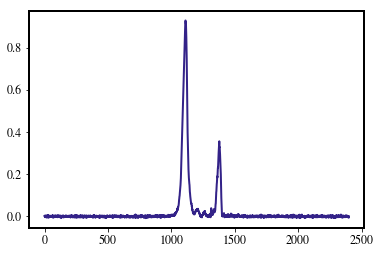

In [22]:
plt.plot(int_arr_p / max(int_arr_m))
plt.show()

In [24]:
max(int_arr_p/max(int_arr_m))

0.928738407329409

In [23]:
max(int_arr_m/max(int_arr_m))

1.0

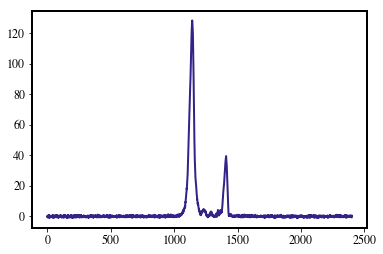

In [19]:
plt.plot(int_arr_m)
plt.show()

In [4]:
# Comparison of reconstructed transverse profiles with and without noise. 
import time
dd   = 2.5e-6
xlas = np.arange(-3e-3, 3e-3+dd, dd)
ylas = np.arange(-3e-3, 3e-3+dd, dd)
#xlas = np.linspace(-3e-3, 3e-3, 100)
#ylas = np.linspace(-3e-3, 3e-3, 100)
I_prof = las_int(xlas,ylas,sigr=0.5e-3)
# EOS setup
tau   = xlas * np.tan(15 * np.pi/180)/c
r0    = 2.5e-3
cpath = "/media/keenan/Data_Storage/Data/currents/"
setup = {
    "ctype"   : "gap",
    "d"       : 100e-6,
    "y0"      : 800e-9,
    "tp"      : 30e-15,
    "r0"      : 2.5e-3,
    "tau"     : tau,
    "fpath"   : cpath,
    "nslice"  : 100,
    "method"  : "spatial",
    "process" : "cross",
    "angle"   : 15,

}
# Set current profile index   

In [5]:
# Loop through N_prof current profiles
# Preallocate
N_shift = -200
offsets = np.linspace(-10, 10, 100)*1e-6
dx_wit_ideal = np.zeros(len(offsets))
dx_dri_ideal = np.zeros(len(offsets))
dx_wit_noise = np.zeros(len(offsets))
dx_dri_noise = np.zeros(len(offsets))
for k in range(len(offsets)):
    if (k+1)%10==0:
        print(k+1, "of", len(offsets))
    ind = random.randint(0, 3134)
    # Preallocate for nested loop
    sig_p  = np.zeros((len(xlas), len(ylas)))
    sig_m  = np.zeros((len(xlas), len(ylas)))
    # Set offset
    dx     = offsets[k]
    # compute signals for each crystal + nominal signal
    setup["r0"] = 2.5e-3 + dx
    sigp, tsig  = eos.get_signal(ind, setup)
    setup["r0"] = 2.5e-3-dx
    sigm, tsig  = eos.get_signal(ind, setup)
    setup["r0"] = 2.5e-3
    sig0, tsig0 = eos.get_signal(ind, setup)
    # Create 2D signal profile
    start = time.time()
    for i in range(len(xlas)):
        x = xlas[i]
        for j in range(len(ylas)):
            y = ylas[j]
            r = np.sqrt(x*x+y*y)
            if r <= 1.5e-3:
                sig_p[:,j]  = sigp
                sig_m[:, j] = sigm
    # Account for laser profile
    I_sig_p = I_prof * np.roll(sig_p, N_shift)
    I_sig_m = I_prof * np.roll(sig_m, N_shift)
    # generate backgrounds
    bkg_p, avg_bkg_p = gen_bkg(xlas, ylas, np.amax(I_sig_p))
    bkg_m, avg_bkg_m = gen_bkg(xlas, ylas, np.amax(I_sig_m))
    I_sig_p_noise = I_sig_p + bkg_p - avg_bkg_p
    I_sig_m_noise = I_sig_m + bkg_m - avg_bkg_m
    # Integrated signal
    int_sigp = np.sum(I_sig_p, axis = 1)
    int_sigm = np.sum(I_sig_m, axis = 1)
    int_sigp_noise = np.sum(I_sig_p_noise, axis=1)
    int_sigm_noise = np.sum(I_sig_m_noise, axis=1)
    # Shift xlas to center on peak signal
    xlas  = xlas - xlas[np.argmax(int_sigp)]
    
    # Reconstruct drive and witness beam transverse centroid position (no noise) 
    R_drive = (max(int_sigp)-max(int_sigm))/(max(int_sigp)+max(int_sigm))
    tw_ind  = np.argmin(abs(tsig - 250e-15))
    R_wit   = (max(int_sigp[tw_ind:-1])-max(int_sigm[tw_ind:-1]))/(max(int_sigp[tw_ind:-1])+max(int_sigm[tw_ind:-1]))

    arg_wit   = 0.5*(max(sigp[tw_ind:-1]) + max(sigm[tw_ind:-1]))
    arg_drive = 0.5*(max(sigp) + max(sigm))
    g0_wit    = 2*np.arcsin(np.sqrt(arg_wit))
    g0_drive  = 2*np.arcsin(np.sqrt(arg_drive))

    dx_wit_ideal[k] = 2.5e-3*R_wit*np.tan(0.5*g0_wit)*1e6
    dx_dri_ideal[k] = 2.5e-3*R_drive*np.tan(0.5*g0_drive)*1e6
    
    # Reconstruct drive and witness beam transverse centroid position with noise
    R_drive_noise = (max(int_sigp_noise)-max(int_sigm_noise))/(max(int_sigp_noise)+max(int_sigm_noise))
    R_wit_noise   = (max(int_sigp_noise[tw_ind:-1])-max(int_sigm_noise[tw_ind:-1]))/(max(int_sigp_noise[tw_ind:-1])+max(int_sigm_noise[tw_ind:-1]))
    sigp_noise = I_sig_p_noise[:, int(0.5*len(ylas))]
    sigm_noise = I_sig_m_noise[:, int(0.5*len(ylas))]
    arg_wit_noise   = 0.5*(max(sigp_noise[tw_ind:-1]) + max(sigm_noise[tw_ind:-1]))
    arg_drive_noise = 0.5*(max(sigp_noise) + max(sigm_noise))
    g0_wit_noise    = 2*np.arcsin(np.sqrt(arg_wit_noise))
    g0_drive_noise  = 2*np.arcsin(np.sqrt(arg_drive_noise))
    
    dx_wit_noise[k] = 2.5e-3*R_wit_noise*np.tan(0.5*g0_wit_noise)*1e6
    dx_dri_noise[k] = 2.5e-3*R_drive_noise*np.tan(0.5*g0_drive_noise)*1e6

10 of 100
20 of 100
30 of 100
40 of 100
50 of 100
60 of 100
70 of 100
80 of 100
90 of 100
100 of 100


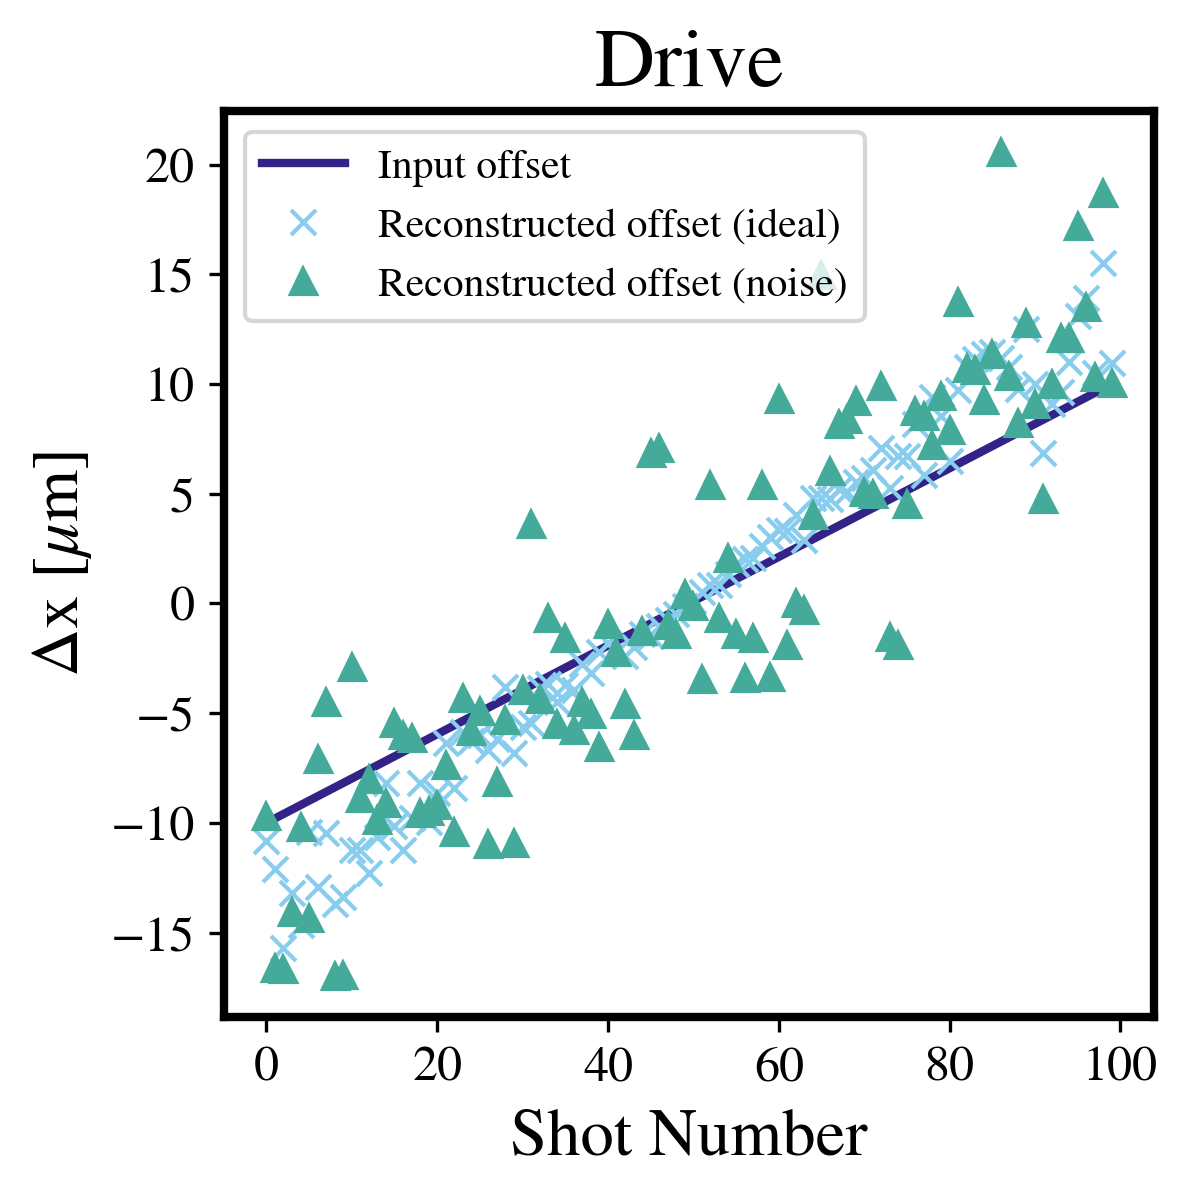

In [6]:
fig = plt.figure(figsize = (4,4), dpi = 300)
ax  = fig.gca()
ax.set_xlabel("Shot Number")
ax.set_ylabel(r'$\Delta$x [$\mu$m]')
ax.set_title("Drive")
ax.plot(offsets*1e6, '-', label = "Input offset")
ax.plot(-dx_dri_ideal, 'x', label = "Reconstructed offset (ideal)")
ax.plot(-dx_dri_noise, '^', label = "Reconstructed offset (noise)")
ax.legend()
plt.show()

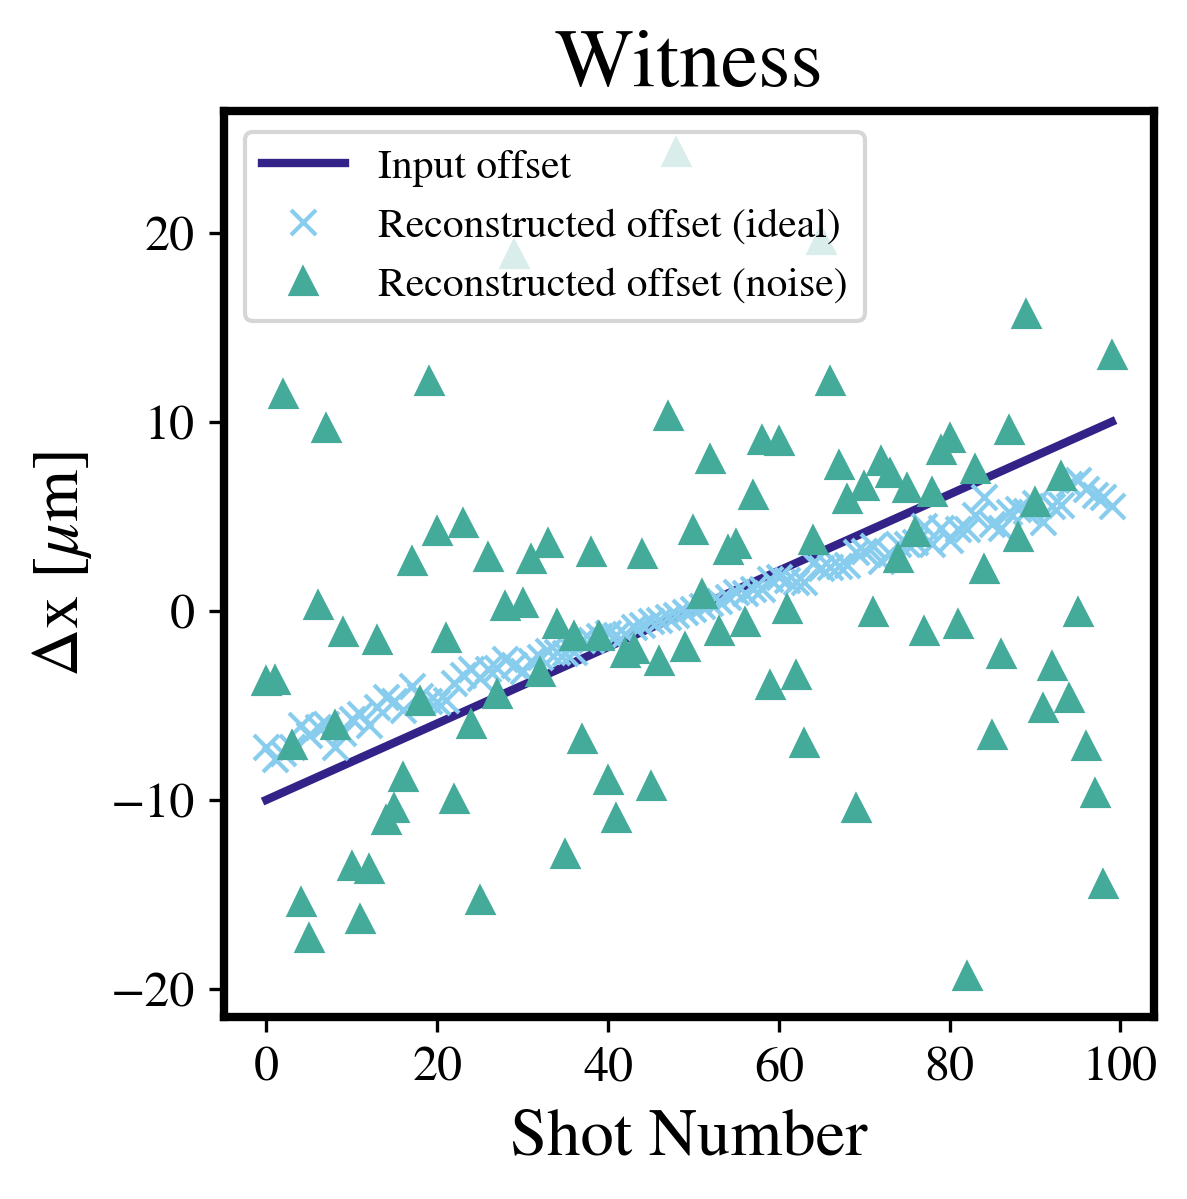

In [7]:
fig = plt.figure(figsize = (4,4), dpi = 300)
ax  = fig.gca()
ax.set_xlabel("Shot Number")
ax.set_ylabel(r'$\Delta$x [$\mu$m]')
ax.set_title("Witness")
ax.plot(offsets*1e6, '-', label = "Input offset")
ax.plot(-dx_wit_ideal, 'x', label = "Reconstructed offset (ideal)")
ax.plot(-dx_wit_noise, '^', label = "Reconstructed offset (noise)")
ax.legend()
plt.show()

In [20]:
# Combined signal
spot_sigm = I_sig_m
spot_sigp = I_sig_p
tp = xlas_p*np.tan(15*np.pi/180)*1e15/c
tm = xlas_m*np.tan(15*np.pi/180)*1e15/c
ext_p = np.array([min(xlas_p), max(xlas_p), min(yplot), max(yplot)])*1e3
ext_m = np.array([min(xlas_m), max(xlas_m), min(yplot), max(yplot)])*1e3
bkg_p, avg_bkg_p = gen_bkg(xlas, ylas, np.amax(spot_sigp))
bkg_m, avg_bkg_m = gen_bkg(xlas, ylas, np.amax(spot_sigm))

psigp = spot_sigp + bkg_p - avg_bkg_p
psigm = spot_sigm + bkg_m - avg_bkg_m

int_sigp = np.sum(psigp, axis=1)
int_sigm = np.sum(psigm, axis=1)
# Temporally align
tp_cen = tp[np.argmax(int_sigp)]
tm_cen = tm[np.argmax(int_sigm)]
tdiff  = tp_cen + tm_cen
tm = tm - tdiff
fig1 = plt.figure(figsize = (4,4), dpi = 300)
ax1  = fig1.gca()
ax1.plot(tp, int_sigp, label = "Crystal A")
ax1.plot(tm, int_sigm, label = "Crystal B")
ax1.set_ylabel("Signal [AU]")
ax1.set_xlabel("t [fs]")
ax1.legend()
plt.show()

NameError: name 'xlas_p' is not defined

In [38]:
R = (int_sigp - int_sigm) / (int_sigp + int_sigm)
arg0 = max(sigp) + max(sigm)
g0   = 2*np.arcsin(np.sqrt(0.5*arg0))
-2.5e-3*np.tan(0.5*g0)*R[np.argmin(abs(tp))]*1e6

6.9596337234630266

In [39]:
np.tan(0.5*g0)

0.6014634543895656

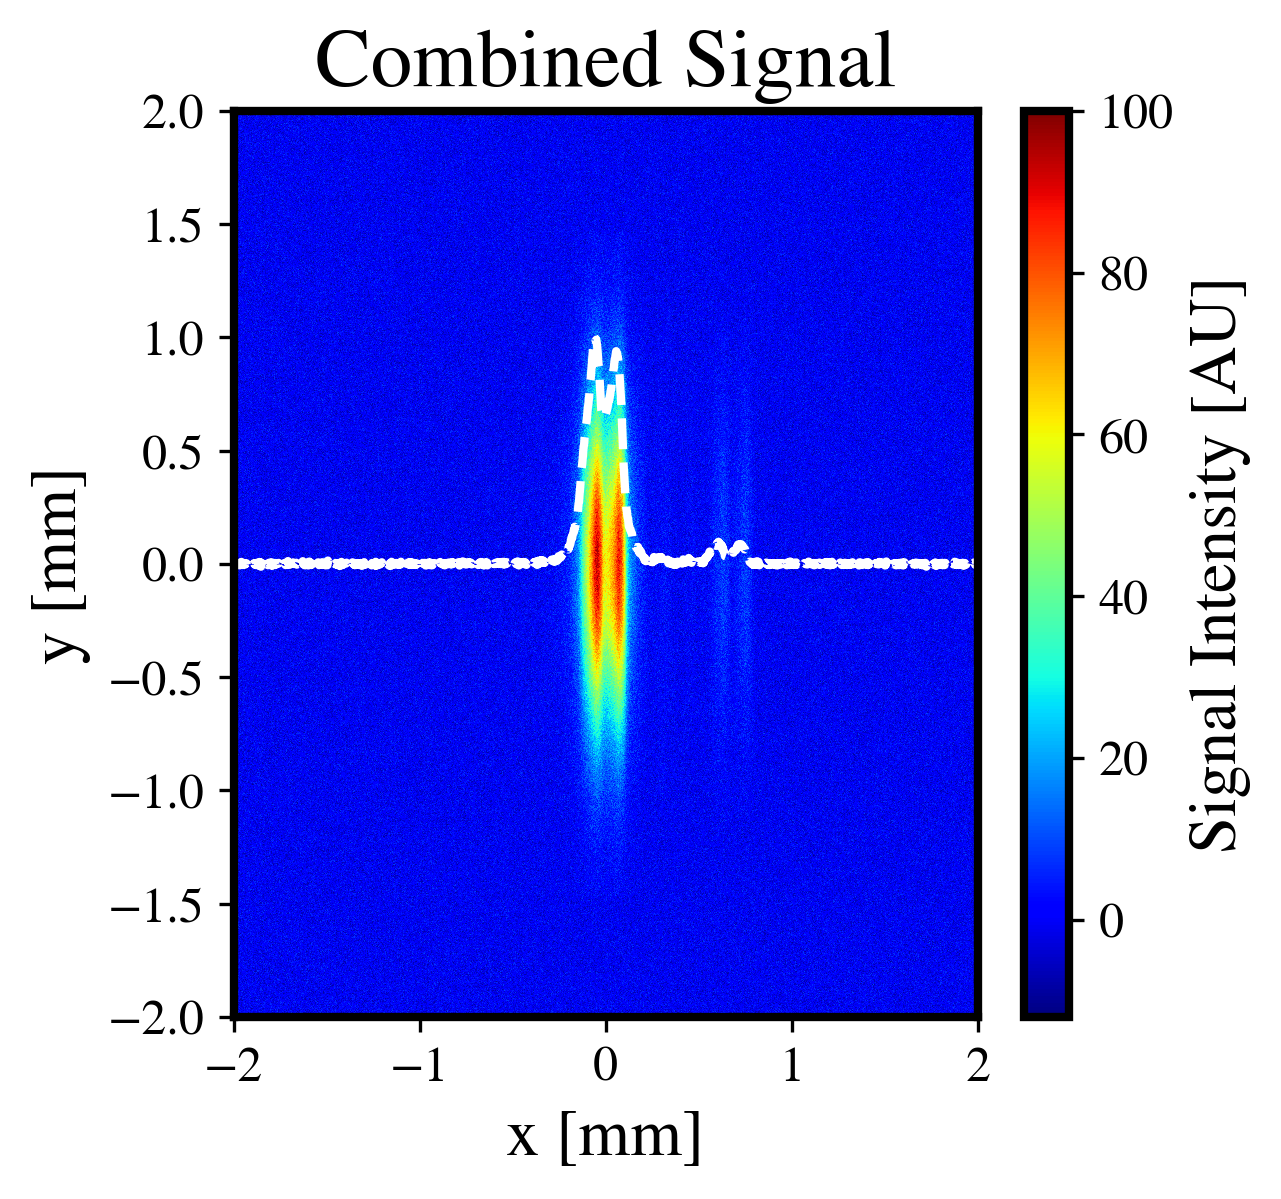

In [43]:
from collections import deque
items = deque(psigm)
items.rotate(N_pix) 
xmin = np.amin(xlas)
xmax = np.amax(xlas)
ext  = np.array([xmin, xmax, min(ylas), max(ylas)])*1e3
fig  = plt.figure(figsize = (4,4), dpi = 300)
ax   = fig.gca()
comb_arr = psigp+items
comb_arr = 100*comb_arr/np.amax(comb_arr)
img = ax.imshow(np.transpose(np.fliplr(comb_arr)), extent = ext, aspect = "auto", cmap = "jet")
int_sig = np.sum(psigp+items, axis = 1)
ax.plot((xlas_p-xlas_p[np.argmax(int_sigp)+int(0.5*N_pix)])*1e3, int_sig/max(int_sig), '-w')
cb = plt.colorbar(mappable = img)
cb.set_label(r'Signal Intensity [AU]')
ax.set_title("Combined Signal")
ax.set_ylabel("y [mm]")
ax.set_xlabel("x [mm]")
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.show()

In [30]:
# Figure: EOS-BPM vs BPM
import random
dtau = 30
tau = np.arange(-500, 1030, dtau)*1e-15
cpath = "/media/keenan/Data_Storage/Data/currents/"
setup = {
    "ctype"   : "gap",
    "d"       : 100e-6,
    "y0"      : 800e-9,
    "tp"      : 30e-15,
    "r0"      : 2.5e-3,
    "tau"     : tau,
    "fpath"   : cpath,
    "nslice"  : 100,
    "method"  : "spatial",
    "process" : "cross",
    "angle"   : 15,

}
# For analysis grab gamma_0 from calibration shots
N_cal     = 10
g10_drive = np.zeros(N_cal)
g10_wit   = np.zeros(N_cal)
t_sep     = 450e-15
for i in range(N_cal):
    # Pick random current profile:
    ind = random.randint(0, 3134)
    sig, tsig = eos.get_signal(ind, setup)
    dmax = np.amax(sig)
    w_ind = np.argmin(abs(tsig-t_sep))
    wmax = np.amax(sig[w_ind:-1])
    g10_drive[i] = 2*np.arcsin(np.sqrt(dmax))
    g10_wit[i]   = 2*np.arcsin(np.sqrt(wmax))
g0_drive = np.mean(g10_drive)
g0_wit   = np.mean(g10_drive)
t_shift = 250e-15
# Set number of shots to create the figure:
N_shots = 100
# Set offset array
N_arr     = np.linspace(0, N_shots, N_shots)
beam_offs = 10e-6*np.sin(N_arr*np.pi/(0.5*N_shots))
# Preallocate
dx_ind   = 0
x_bpm    = np.zeros(N_shots)
dx_drive = np.zeros(N_shots)
dx_wit   = np.zeros(N_shots)
wit_avg  = np.zeros(N_shots)
for i in range(N_shots):
    if (i+1)%10==0:
        print(i+1, "of", N_shots)
    # Grab random current index
    ind = random.randint(0, 3134)

    # set offset
    dx = beam_offs[i]
    # Add random witness bunch offset (max 2 micron)
    dxw = random.uniform(0,5)*1e-6
    wit_sign = random.randint(1,2)
    if wit_sign == 1:
        wit_sign = -1
    else:
        wit_sign = 1
    dxw = wit_sign*dxw
    wit_avg[i] = dxw
    # Add random noise to bpm measurement (order 10%)
    # Set BPM measurement as weighted average of beams
    noise = 0.1*random.uniform(-1,1)
    x_bpm[i] = (0.33*(dx+dxw)+0.66*dx)
    x_bpm[i] = x_bpm[i] + noise*x_bpm[i]
    # Compute electric field of individual bunches
    I, ti, dm = cp.get_current(ind, cpath)
    w_ind = np.argmin(abs(ti - t_shift))
    I_drive = I[0:w_ind]; ti_drive = ti[0:w_ind]
    I_wit   = I[w_ind:-1]; ti_wit  = ti[w_ind:-1]
    ti_wit  = ti_wit - ti_wit[np.argmax(I_wit)]

    # Compute both crystal signals for both beams
    # Drive
    Ep_drive, tep_drive     = cp.get_E(I_drive, ti_drive, setup["r0"]+dx)
    Em_drive, tem_drive     = cp.get_E(I_drive, ti_drive, setup["r0"]-dx)
    E0_drive, te0_drive     = cp.get_E(I_drive, ti_drive, setup["r0"])
    sig_dp, t_dp, g_dp, dum = eos.E_signal(Ep_drive, tep_drive, setup)
    sig_dm, t_dm, g_dm, dum = eos.E_signal(Em_drive, tem_drive, setup)
    sig_d, t_d, g_d, dum    = eos.E_signal(E0_drive, te0_drive, setup)
    g0_drive  = 2*np.arcsin(np.sqrt(0.5*max(sig_dp + sig_dm)))
    # Witness
    Ep_wit, tep_wit         = cp.get_E(I_wit, ti_wit, setup["r0"]+dx+dxw)
    Em_wit, tem_wit         = cp.get_E(I_wit, ti_wit, setup["r0"]-dx-dxw)
    E0_wit, te0_wit         = cp.get_E(I_wit, ti_wit, setup["r0"])
    sig_wp, t_wp, g_wp, dum = eos.E_signal(Ep_wit, tep_wit, setup)
    sig_wm, t_wm, g_wm, dum = eos.E_signal(Em_wit, tem_wit, setup)
    sig_w, t_w, g_w, dum    = eos.E_signal(E0_wit, te0_wit, setup)
    g0_wit = 2*np.arcsin(np.sqrt(max(sig_w)))

    # Compute offsets of both beams (filter for high current)
    # Drive
    R_drive     = (sig_dp - sig_dm) / (sig_dp + sig_dm)
    R_drive     = R_drive[np.argmax(sig_d)]
    dx_drive[i] = -setup["r0"] * np.tan(0.5*g0_drive) * R_drive

    R_wit     = (sig_wp - sig_wm) / (sig_wp + sig_wm)
    R_wit     = R_wit[np.argmax(sig_w)]
    dx_wit[i] = -setup["r0"] * np.tan(0.5*g0_wit) * R_wit
    check1[i] = R_drive
    check2[i] = g0_drive

10 of 100
20 of 100
30 of 100
40 of 100
50 of 100
60 of 100
70 of 100
80 of 100
90 of 100
100 of 100


In [31]:
dxw*1e6

-3.050129275718925

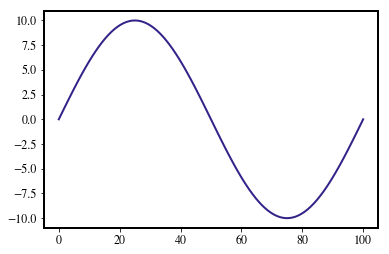

In [32]:
plt.plot(N_arr, beam_offs*1e6)
plt.show()

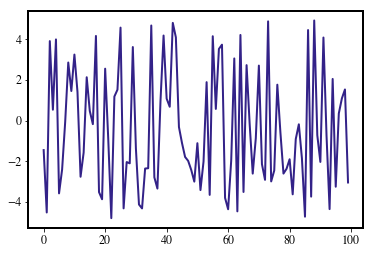

In [33]:
plt.plot(wit_avg*1e6)
plt.show()

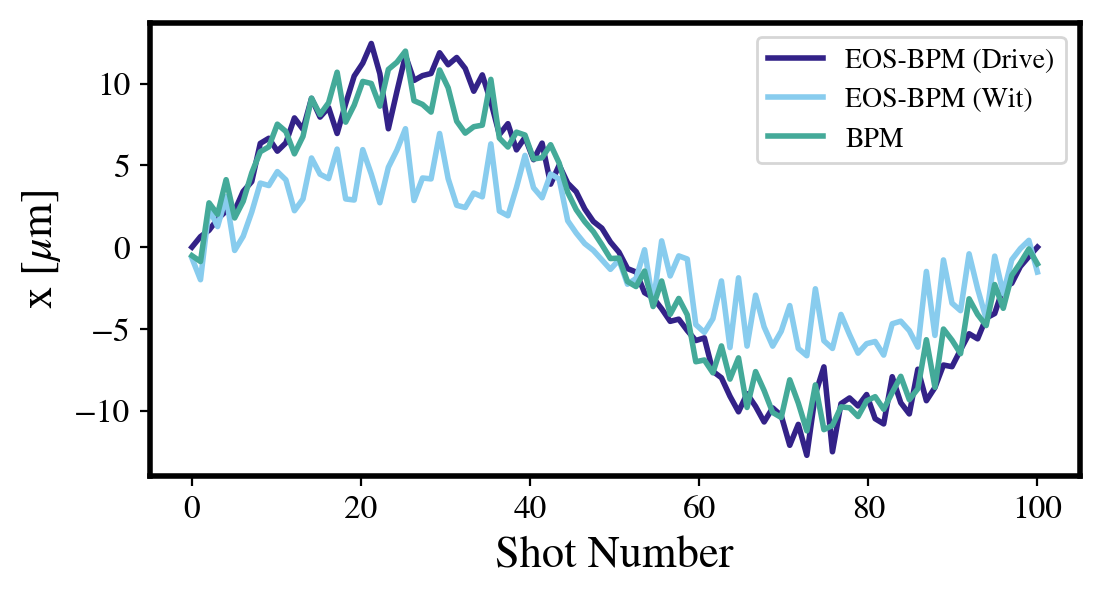

In [34]:
fig  = plt.figure(figsize = (6,3), dpi = 200)
ax1  = fig.add_subplot(111)
ax1.set_ylabel(r'x [$\mu$m]')
ax1.set_xlabel("Shot Number")
ax1.plot(N_arr, dx_drive*1e6, '-', label = "EOS-BPM (Drive)")
ax1.plot(N_arr, dx_wit*1e6, '-', label = "EOS-BPM (Wit)")
ax1.plot(N_arr, x_bpm*1e6, label = "BPM")
ax1.legend()
plt.show()

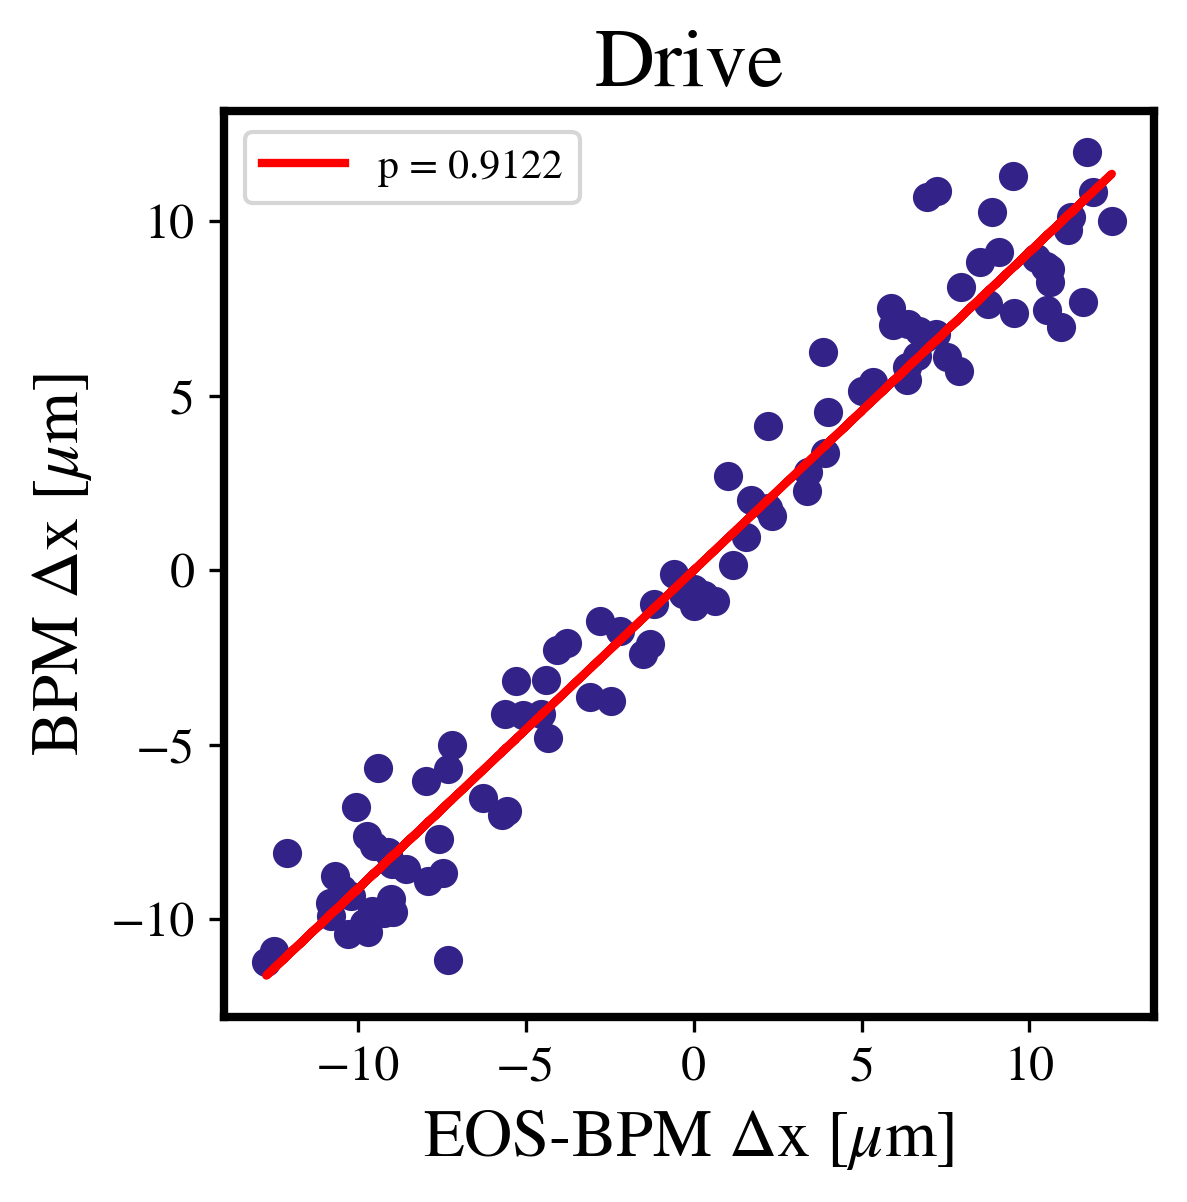

In [42]:
fig = plt.figure(figsize = (4,4), dpi = 300)
ax  = fig.gca()
ax.set_title("Drive")
ax.set_xlabel(r'EOS-BPM $\Delta$x [$\mu$m]')
ax.set_ylabel(r'BPM $\Delta$x [$\mu$m]')
p, v = np.polyfit(dx_drive*1e6, x_bpm*1e6, deg=1)
ax.plot(dx_drive*1e6, x_bpm*1e6, 'o')
ax.plot(dx_drive*1e6, p*dx_drive*1e6, '--k', label = 'p = ' + str(np.round(p, 4)))
ax.legend()
plt.show()

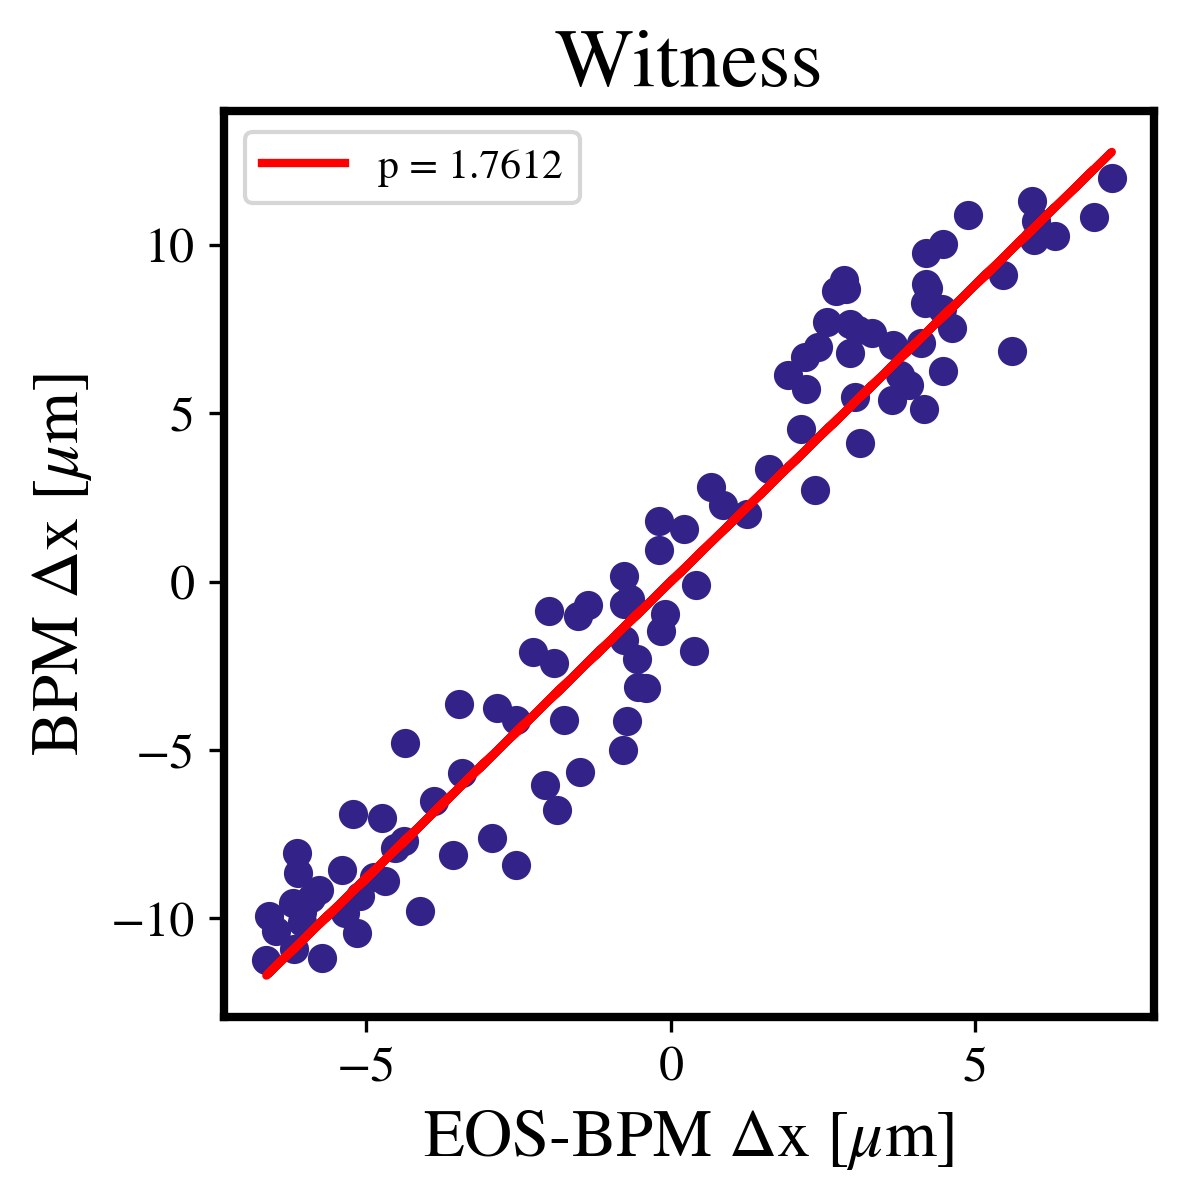

In [44]:
fig = plt.figure(figsize = (4,4), dpi = 300)
ax  = fig.gca()
ax.set_title("Witness")
ax.set_xlabel(r'EOS-BPM $\Delta$x [$\mu$m]')
ax.set_ylabel(r'BPM $\Delta$x [$\mu$m]')
p, v = np.polyfit(dx_wit*1e6, x_bpm*1e6, deg=1)
ax.plot(dx_wit*1e6, x_bpm*1e6, 'o')
ax.plot(dx_wit*1e6, p*dx_wit*1e6, '-r', label = 'p = ' + str(np.round(p, 4)))
ax.legend()
plt.show()

In [23]:
# Maybe not for paper but peak EO signal vs peak input current to compare to TCAV
dtau = 30
tau = np.arange(-500, 1030, dtau)*1e-15
cpath = "/media/keenan/Data_Storage/Data/currents/"
setup = {
    "ctype"   : "gap",
    "d"       : 100e-6,
    "y0"      : 800e-9,
    "tp"      : 30e-15,
    "r0"      : 2.5e-3,
    "tau"     : tau,
    "fpath"   : cpath,
    "nslice"  : 100,
    "method"  : "spatial",
    "process" : "cross",
    "angle"   : 15,

}
N_inds  = 3135
max_Id  = np.zeros(N_inds)
max_Iw  = np.zeros(N_inds)
max_Sd  = np.zeros(N_inds)
max_Sw  = np.zeros(N_inds)
t_shift = 200e-15
for ind in range(N_inds):
    if (ind+1)%1000==0:
        print(ind+1, "of 3135")
    I, ti, p2p = cp.get_current(ind, cpath)
    sig, tsig  = eos.get_signal(ind, setup)
    wi_ind = np.argmin(abs(ti - t_shift))
    ws_ind = np.argmin(abs(tsig - t_shift))
    max_Id[ind] = max(I[0:wi_ind])
    max_Iw[ind] = max(I[wi_ind:-1])
    
    max_Sd[ind] = max(sig[0:ws_ind])
    max_Sw[ind] = max(sig[ws_ind:-1])

1000 of 3135
2000 of 3135
3000 of 3135


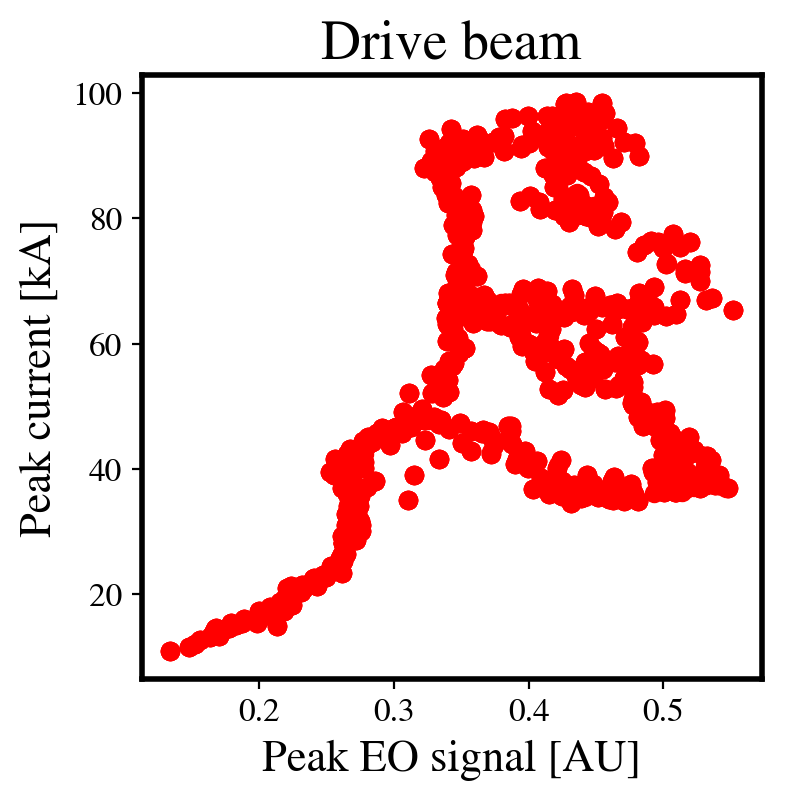

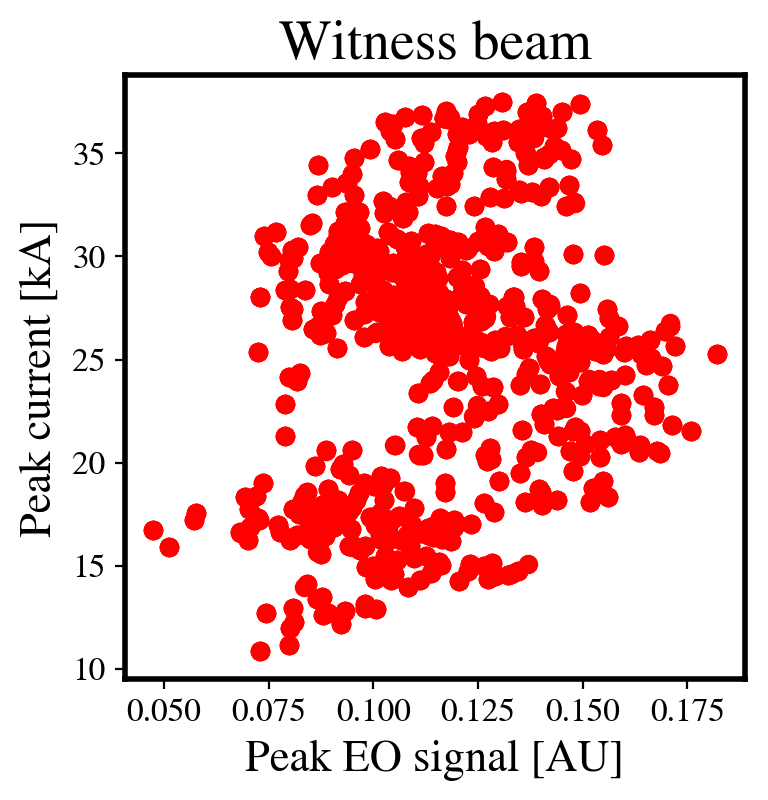

In [24]:
fig1 = plt.figure(figsize = (4, 4), dpi = 200)
ax1  = fig1.gca()
ax1.set_ylabel(r'Peak current [kA]')
ax1.set_xlabel(r'Peak EO signal [AU]')
ax1.plot(max_Sd, max_Id, 'ro')
ax1.set_title("Drive beam")

fig2 = plt.figure(figsize = (4, 4), dpi = 200)
ax2  = fig2.gca()
ax2.set_ylabel(r'Peak current [kA]')
ax2.set_xlabel(r'Peak EO signal [AU]')
ax2.plot(max_Sw, max_Iw, 'ro')
ax2.set_title("Witness beam")
plt.show()